# Preliminary

In [47]:
### import libraries ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.lines as mlines
import os
from singlestarevo import extract     # from singlestarevo.py, to extract single stellar evolution data

In [48]:
### set parameters ###

# [Nsim] is the number of simulations and is used to locate all the related folders
# [Z] is the metallicity of the stars                               e.g. '02' for Z=0.02 solar metallicity
# [SN] is the SN explosion prescription adopted                     e.g. 'del' for delayed or 'com' for compact
# [Hsup] is the threshold for spectroscopic WR                      e.g. '0.3' for WR with H < 0.3 on surface
# [thres_RL] is the threshold for Roche Lobe filling binaries
# [thres_wind] is the threshold for wind fed binaries

Nsim = '1mln'
Z_list = ['02', '02', '02', '02']
SN_list = ['del','del','com','com']
Hsup = 0.3
thres_RL = 1.
thres_wind = 0.8

wind_perc = int(thres_wind*100) # for plot labels

In [49]:
### Set paths ###
version = '3.0.0-Spindevel'                            # for SEVN2 version adopted
path_plots=f'./v_{version}/plots/'                             # where plots will be stored

### check directories exist or create them ###
os.makedirs(path_plots, exist_ok=True)

In [50]:
### Prepare list for plots ###
prefix_list = ['pr','if','pr','if']

In [51]:
### set parameters for plots ###
plt.rcParams.update({'text.usetex': True, 
                     'font.family': 'Helvetica', 
                     'font.size': 40})
lw = 2.5  # linewidth

# All binaries

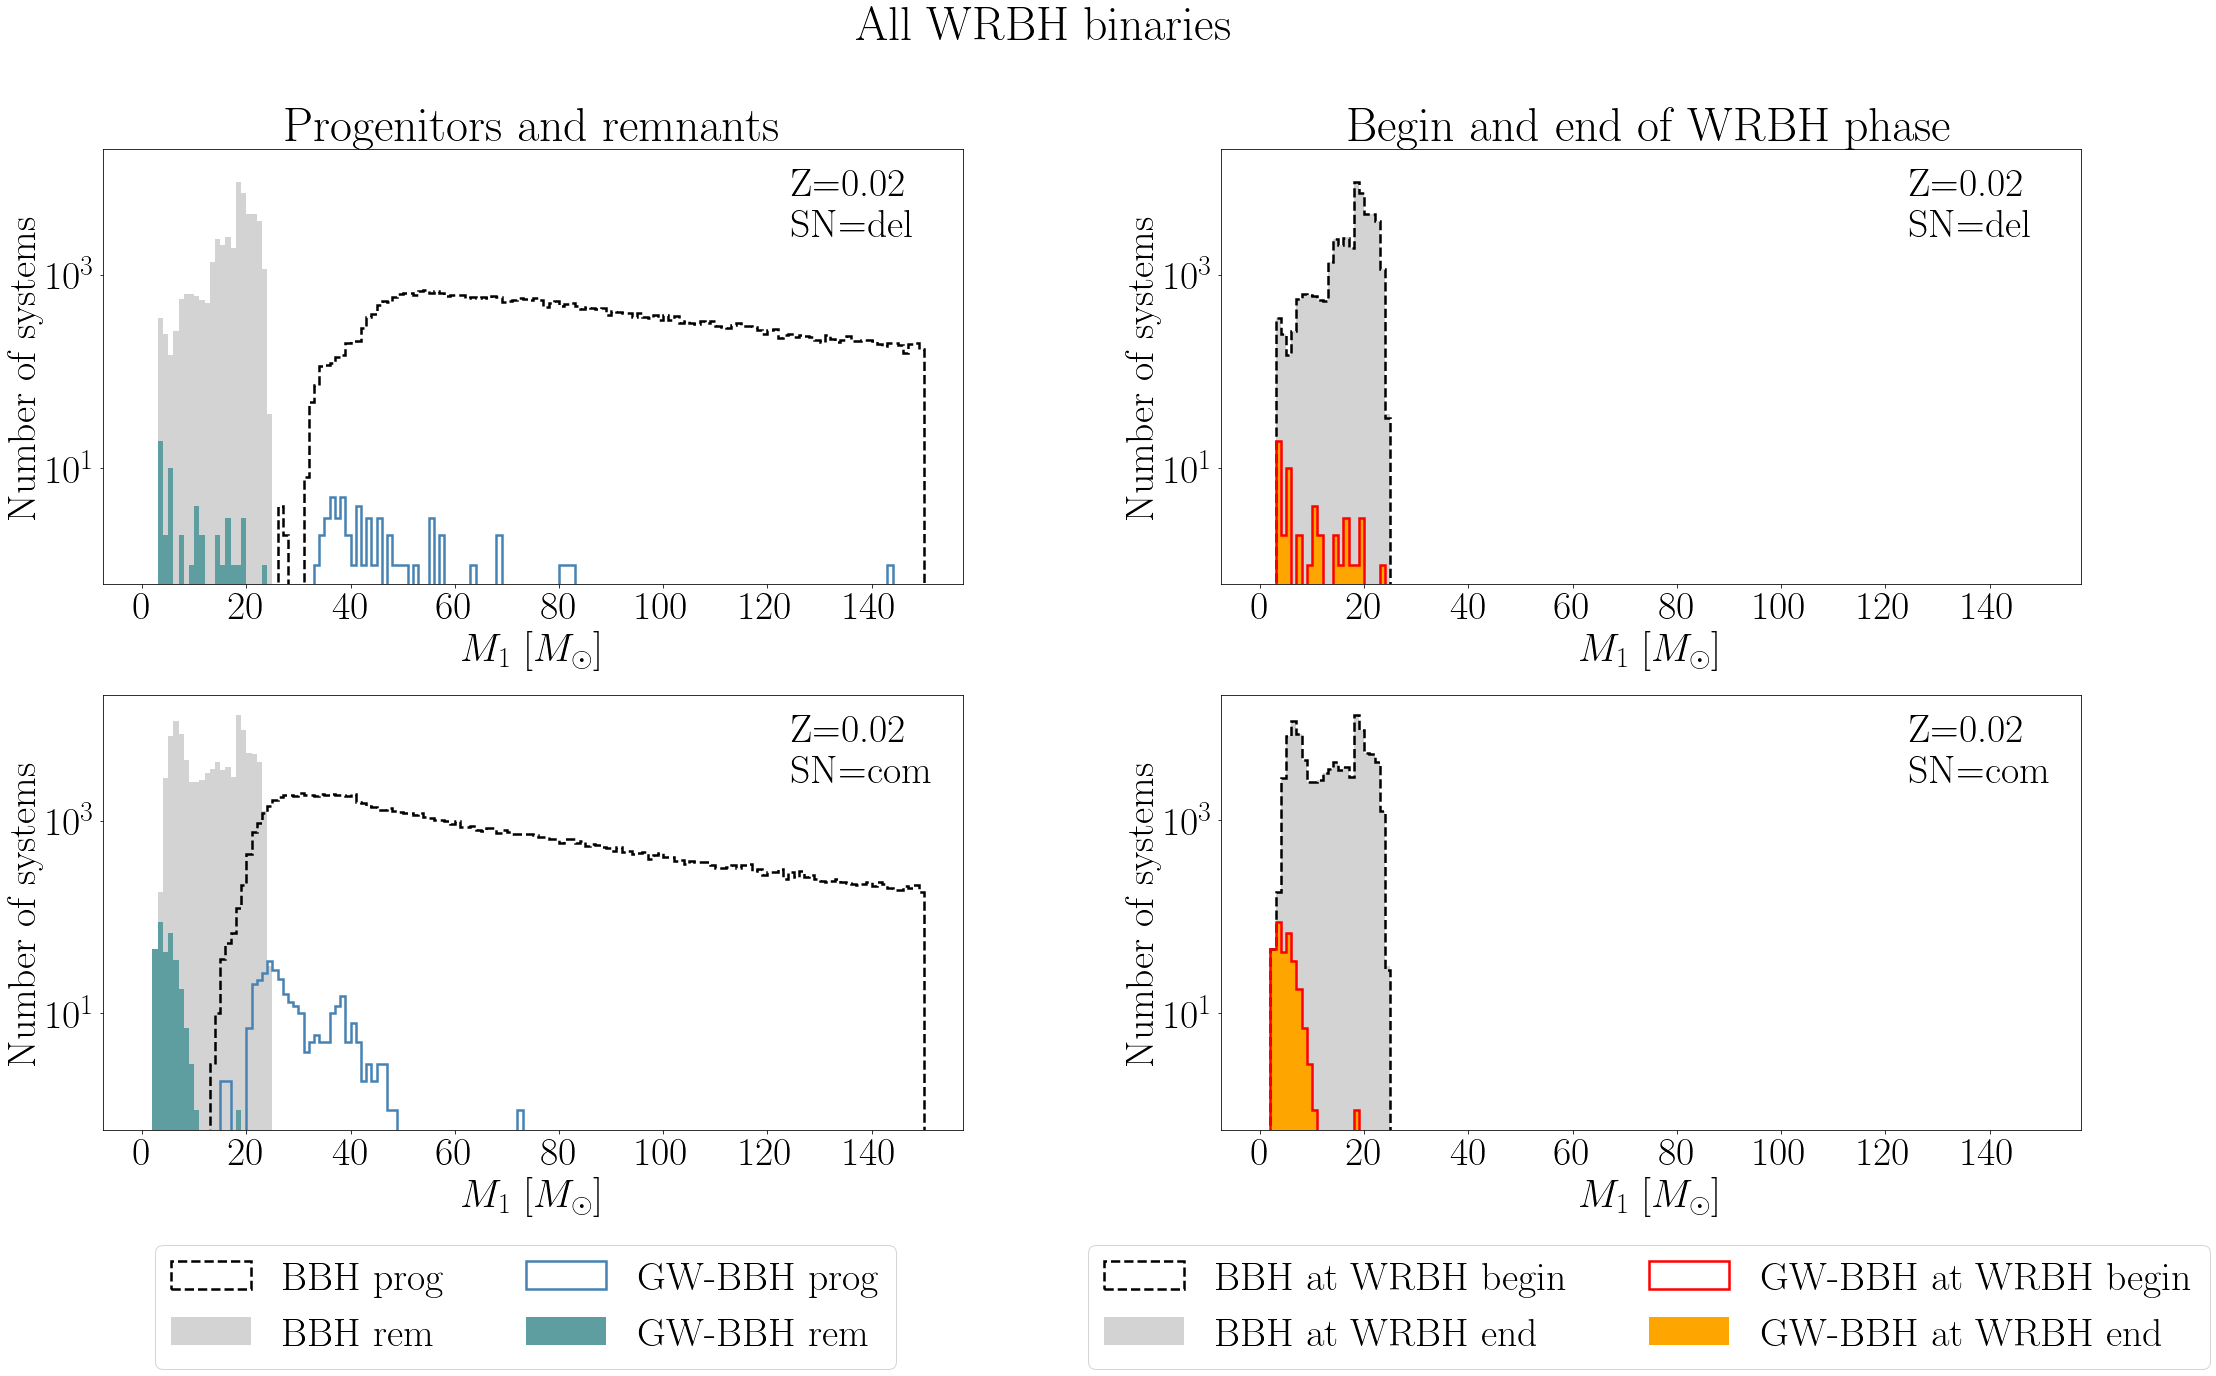

In [52]:
# All binaries

plottype = 'hist_mass_M1_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('All WRBH binaries')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###
    # progenitors and remnants
    if prefix == 'pr':
        path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
        path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored
        
        p1,r1 = pd.read_csv(f'{path_df_prog}p_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

        labels1=['BBH prog',
            r'GW-BBH prog']
        labels2=['BBH rem',
            r'GW-BBH rem']
        colors1=['k','steelblue']
        colors2=['lightgrey','cadetblue']
    
    # initial and final state of 
    elif prefix == 'if':
        path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
        path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored
        
        p1,r1 = pd.read_csv(f'{path_df_in}i_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

        labels1=['BBH at WRBH begin',
            r'GW-BBH at WRBH begin']
        labels2=['BBH at WRBH end',
            r'GW-BBH at WRBH end']
        colors1=['k','r']
        colors2=['lightgrey','orange']
    
    list_1 = [p1,p2]  # list of initial values
    list_2 = [r1,r2]   # list of final values

    linestyles=['dashed','solid']
    
    bin_edges_mass=np.arange(0,151,1)       # 1 M_sun is the witdth of each bin

    for df1,df2, label1,label2, color1,color2,linestyle in zip(list_1,list_2, labels1,labels2, colors1,colors2,linestyles):
        
        ax.hist(df1['Mass_0'], bins=bin_edges_mass, label=label1, color=color1, linestyle=linestyle, linewidth = lw, log=True,  histtype='step')
        ax.hist(df2['Mass_0'], bins=bin_edges_mass, label=label2, color=color2, linestyle=linestyle, linewidth = lw, log=True,  histtype='stepfilled')
        
    
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.8, 0.8),xycoords='axes fraction')
    ax.set_xlabel(r'$\displaystyle M_1~[M_\odot]$')
    ax.set_ylabel(r'Number of systems')
    ax.set_ylim(ymax=20000)
    ax.set_xticks(np.arange(0, 150+1,20))

axs[0][0].set_title('Progenitors and remnants')
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.26,0.02))   # 0.48

axs[0][1].set_title('Begin and end of WRBH phase')
handles, labels = axs[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.78,0.02))   
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3,bottom=0.2)

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

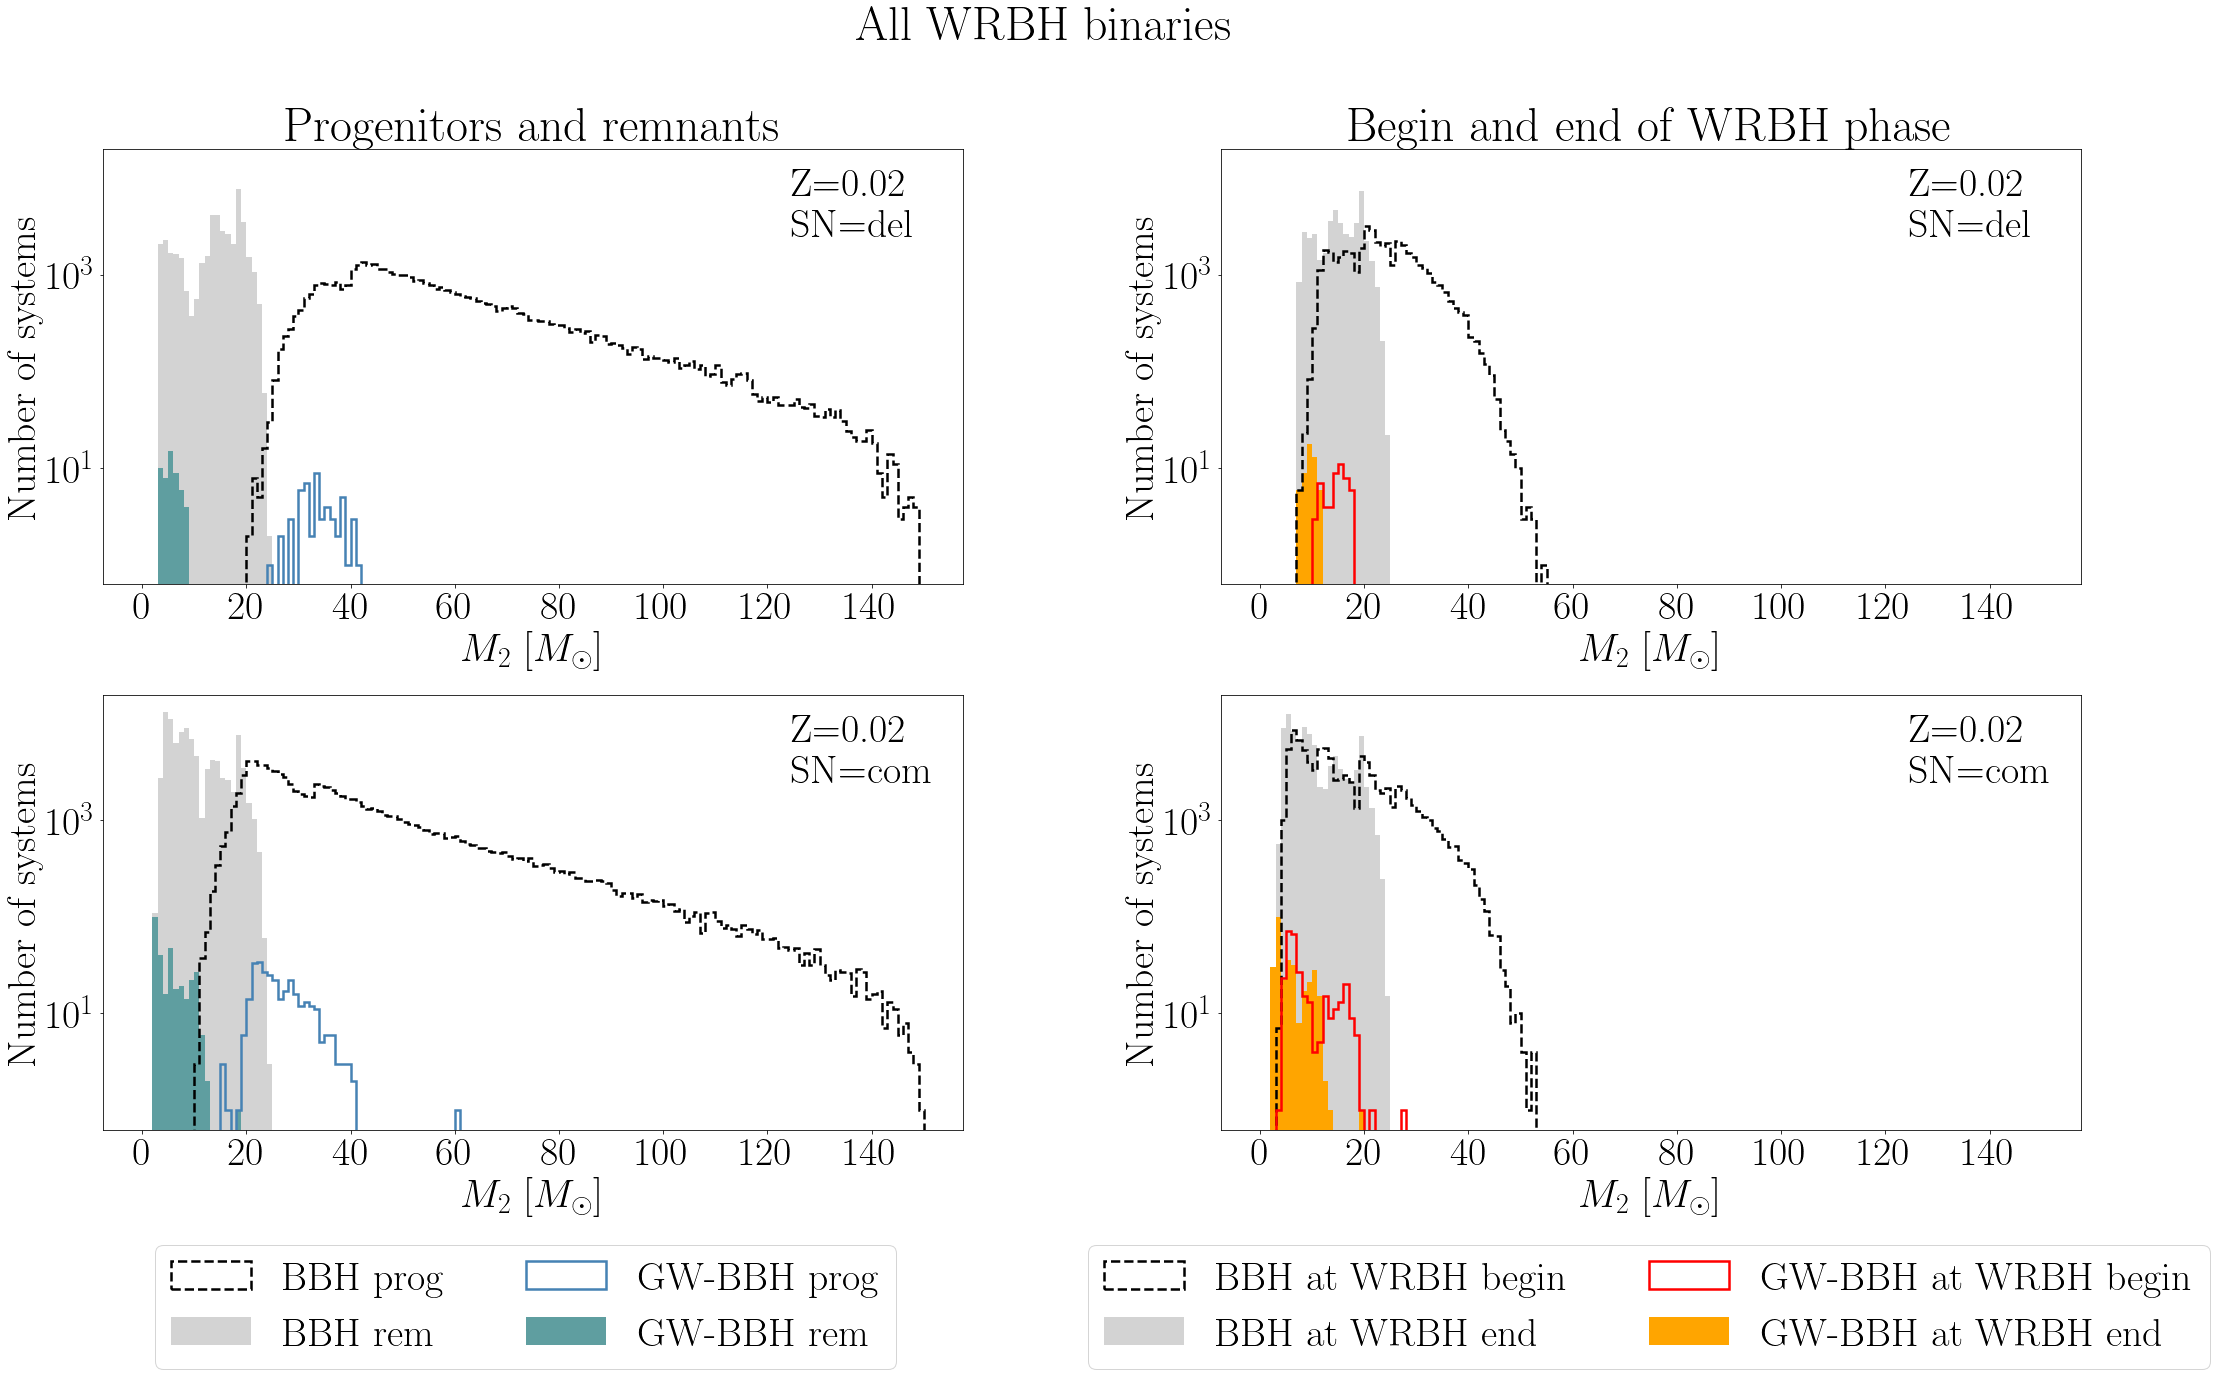

In [53]:
plottype = 'hist_mass_M2_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('All WRBH binaries')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###
    # progenitors and remnants
    if prefix == 'pr':
        path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
        path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored
        
        p1,r1 = pd.read_csv(f'{path_df_prog}p_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

        labels1=['BBH prog',
            r'GW-BBH prog']
        labels2=['BBH rem',
            r'GW-BBH rem']
        colors1=['k','steelblue']
        colors2=['lightgrey','cadetblue']
    
    # initial and final state of 
    elif prefix == 'if':
        path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
        path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored
        
        p1,r1 = pd.read_csv(f'{path_df_in}i_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

        labels1=['BBH at WRBH begin',
            r'GW-BBH at WRBH begin']
        labels2=['BBH at WRBH end',
            r'GW-BBH at WRBH end']
        colors1=['k','r']
        colors2=['lightgrey','orange']
    
    list_1 = [p1,p2]  # list of initial values
    list_2 = [r1,r2]   # list of final values

    linestyles=['dashed','solid']
    
    bin_edges_mass=np.arange(0,151,1)       # 1 M_sun is the witdth of each bin

    for df1,df2, label1,label2, color1,color2,linestyle in zip(list_1,list_2, labels1,labels2, colors1,colors2,linestyles):
        
        ax.hist(df1['Mass_1'], bins=bin_edges_mass, label=label1, color=color1, linestyle=linestyle, linewidth = lw, log=True,  histtype='step')
        ax.hist(df2['Mass_1'], bins=bin_edges_mass, label=label2, color=color2, linestyle=linestyle, linewidth = lw, log=True,  histtype='stepfilled')
        
    
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.8, 0.8),xycoords='axes fraction')
    ax.set_xlabel(r'$\displaystyle M_2~[M_\odot]$')
    ax.set_ylabel(r'Number of systems')
    ax.set_ylim(ymax=20000)
    ax.set_xticks(np.arange(0, 150+1,20))

axs[0][0].set_title('Progenitors and remnants')
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.26,0.02))   # 0.48

axs[0][1].set_title('Begin and end of WRBH phase')
handles, labels = axs[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.78,0.02))   
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3,bottom=0.2)

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

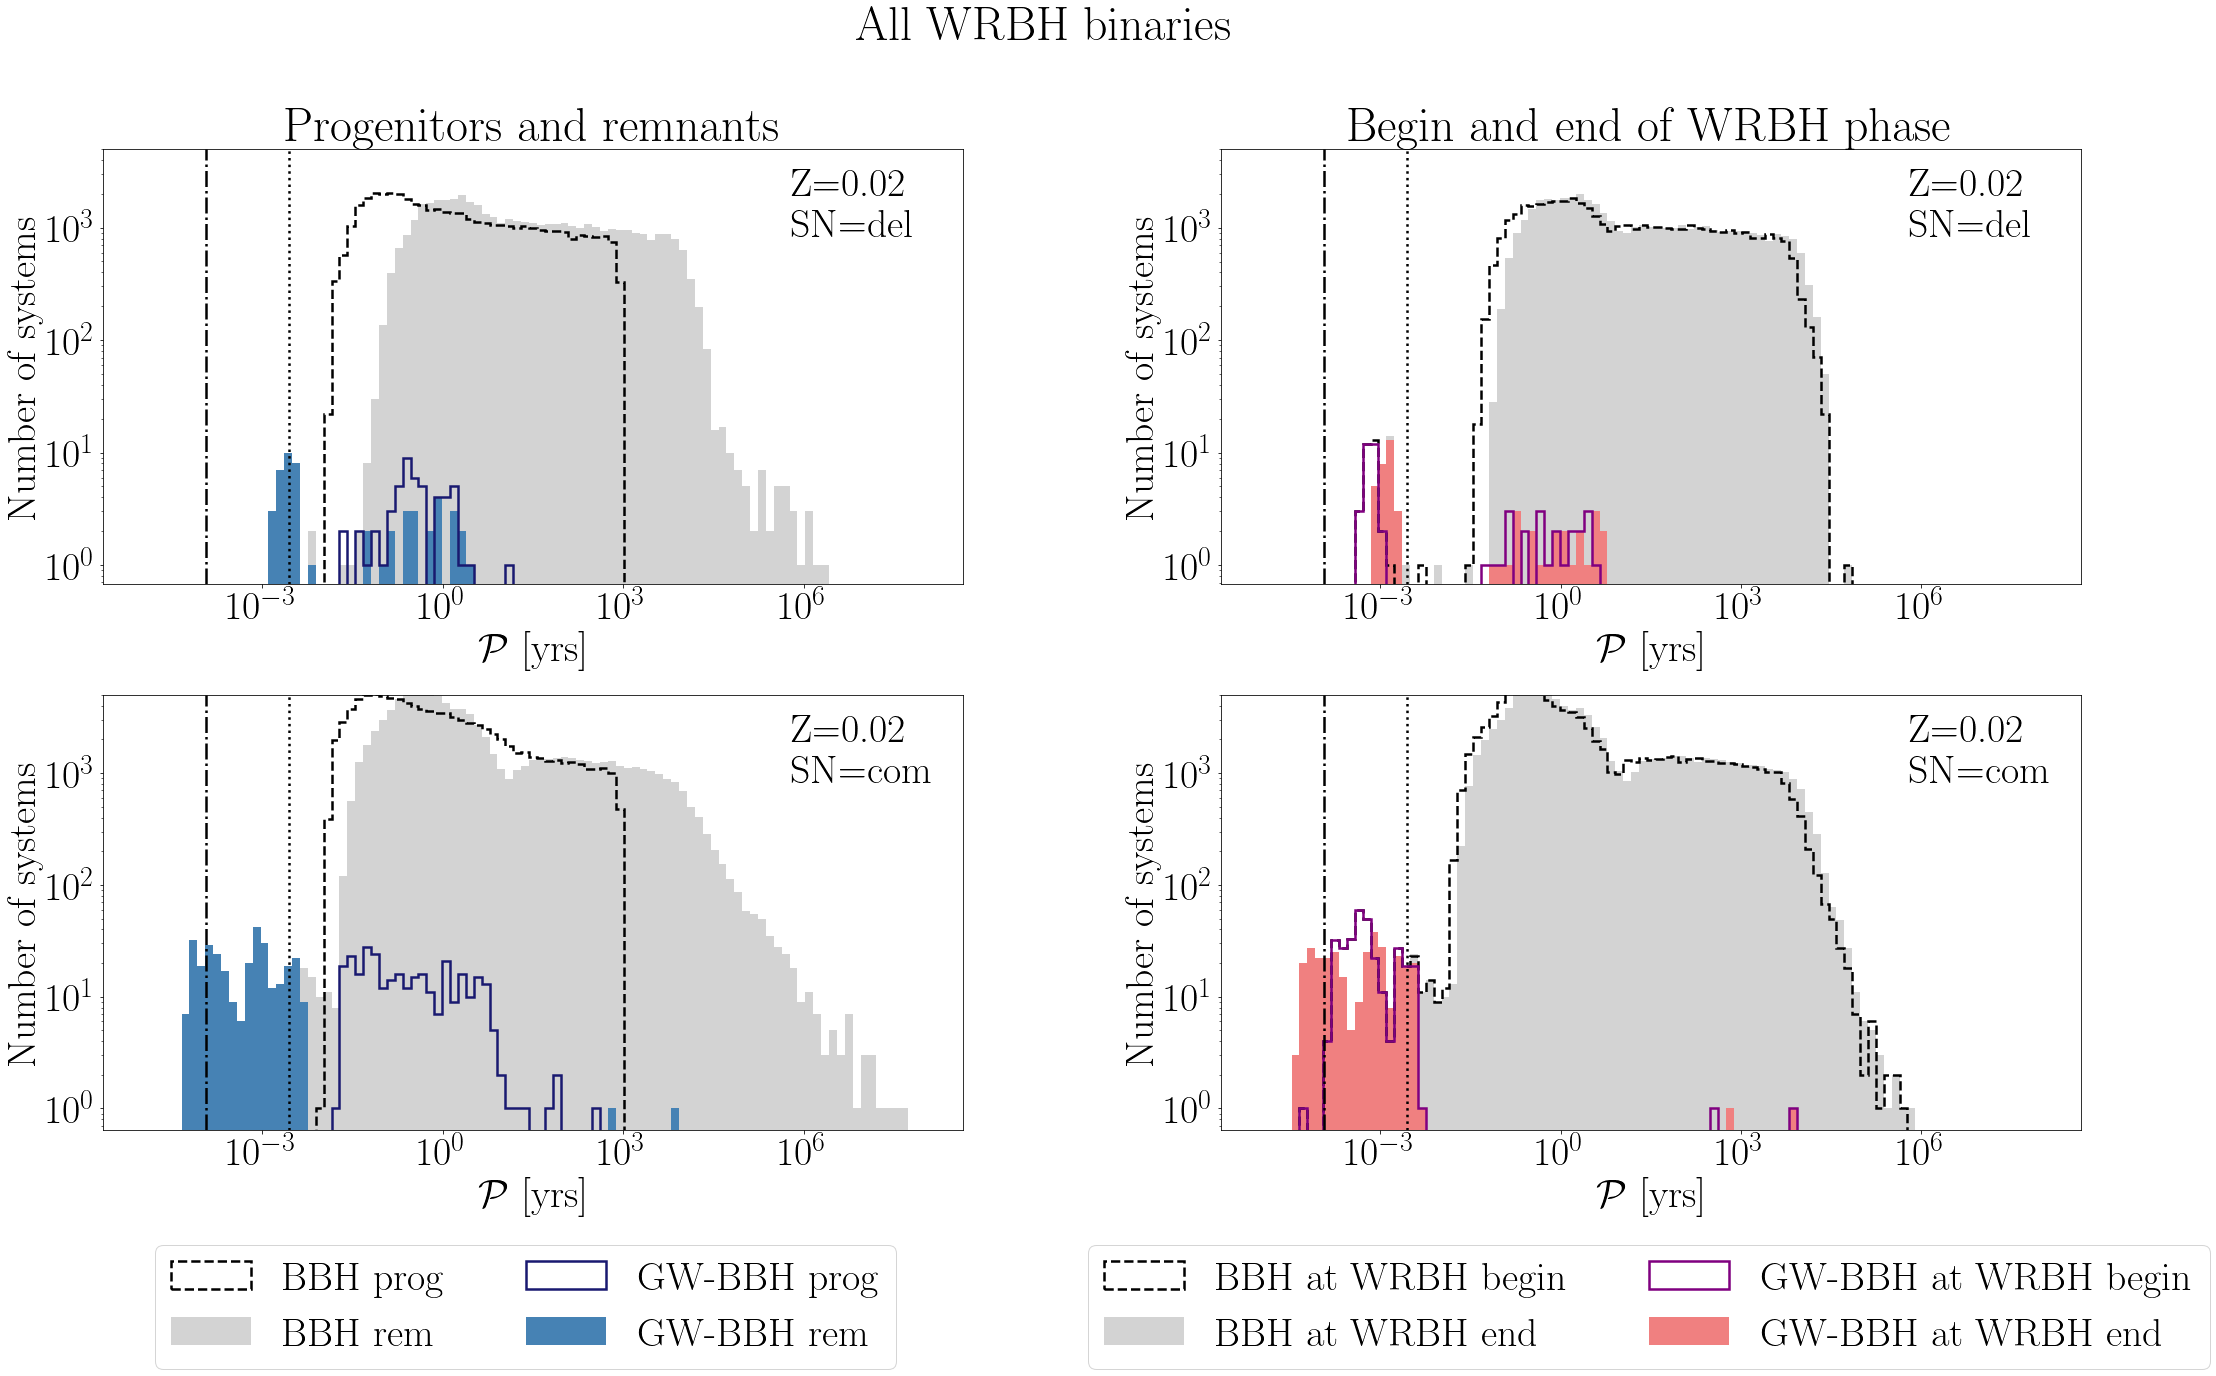

In [54]:
plottype = 'hist_per_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('All WRBH binaries')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###
    # progenitors and remnants
    if prefix == 'pr':
        path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
        path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored
        
        p1,r1 = pd.read_csv(f'{path_df_prog}p_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

        labels1=['BBH prog',
            r'GW-BBH prog']
        labels2=['BBH rem',
            r'GW-BBH rem']
        colors1=['k','midnightblue']
        colors2=['lightgrey','steelblue']
    
    # initial and final state of 
    elif prefix == 'if':
        path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
        path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored
        
        p1,r1 = pd.read_csv(f'{path_df_in}i_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

        labels1=['BBH at WRBH begin',
            r'GW-BBH at WRBH begin']
        labels2=['BBH at WRBH end',
            r'GW-BBH at WRBH end']
        colors1=['k','purple']
        colors2=['lightgrey','lightcoral']
    
    list_1 = [p1,p2]  # list of initial values
    list_2 = [r1,r2]   # list of final values

    linestyles=['dashed','solid']

    bin_edges_period=np.logspace(np.log10(1e-5),np.log10(1e8),100)  # 100 yrs width of each bin
    

    for df1,df2, label1,label2, color1,color2,linestyle in zip(list_1, list_2, labels1,labels2, colors1,colors2,linestyles):

        ax.hist(df1['Period'], bins=bin_edges_period, label=label1, color=color1, linestyle=linestyle, linewidth = lw, log=True,  histtype='step')
        ax.hist(df2['Period'], bins=bin_edges_period, label=label2, color=color2, linestyle=linestyle, linewidth = lw, log=True,  histtype='stepfilled')
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
    
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.8, 0.8),xycoords='axes fraction')
    ax.set_xlabel(r'$\displaystyle \mathcal{P}$ [yrs]')
    ax.set_ylabel(r'Number of systems')
    ax.set_ylim(ymax=5000)    
    ax.set_xscale('log')

axs[0][0].set_title('Progenitors and remnants')
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.26,0.02))   # 0.48

axs[0][1].set_title('Begin and end of WRBH phase')
handles, labels = axs[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.78,0.02))   
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3,bottom=0.2)

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

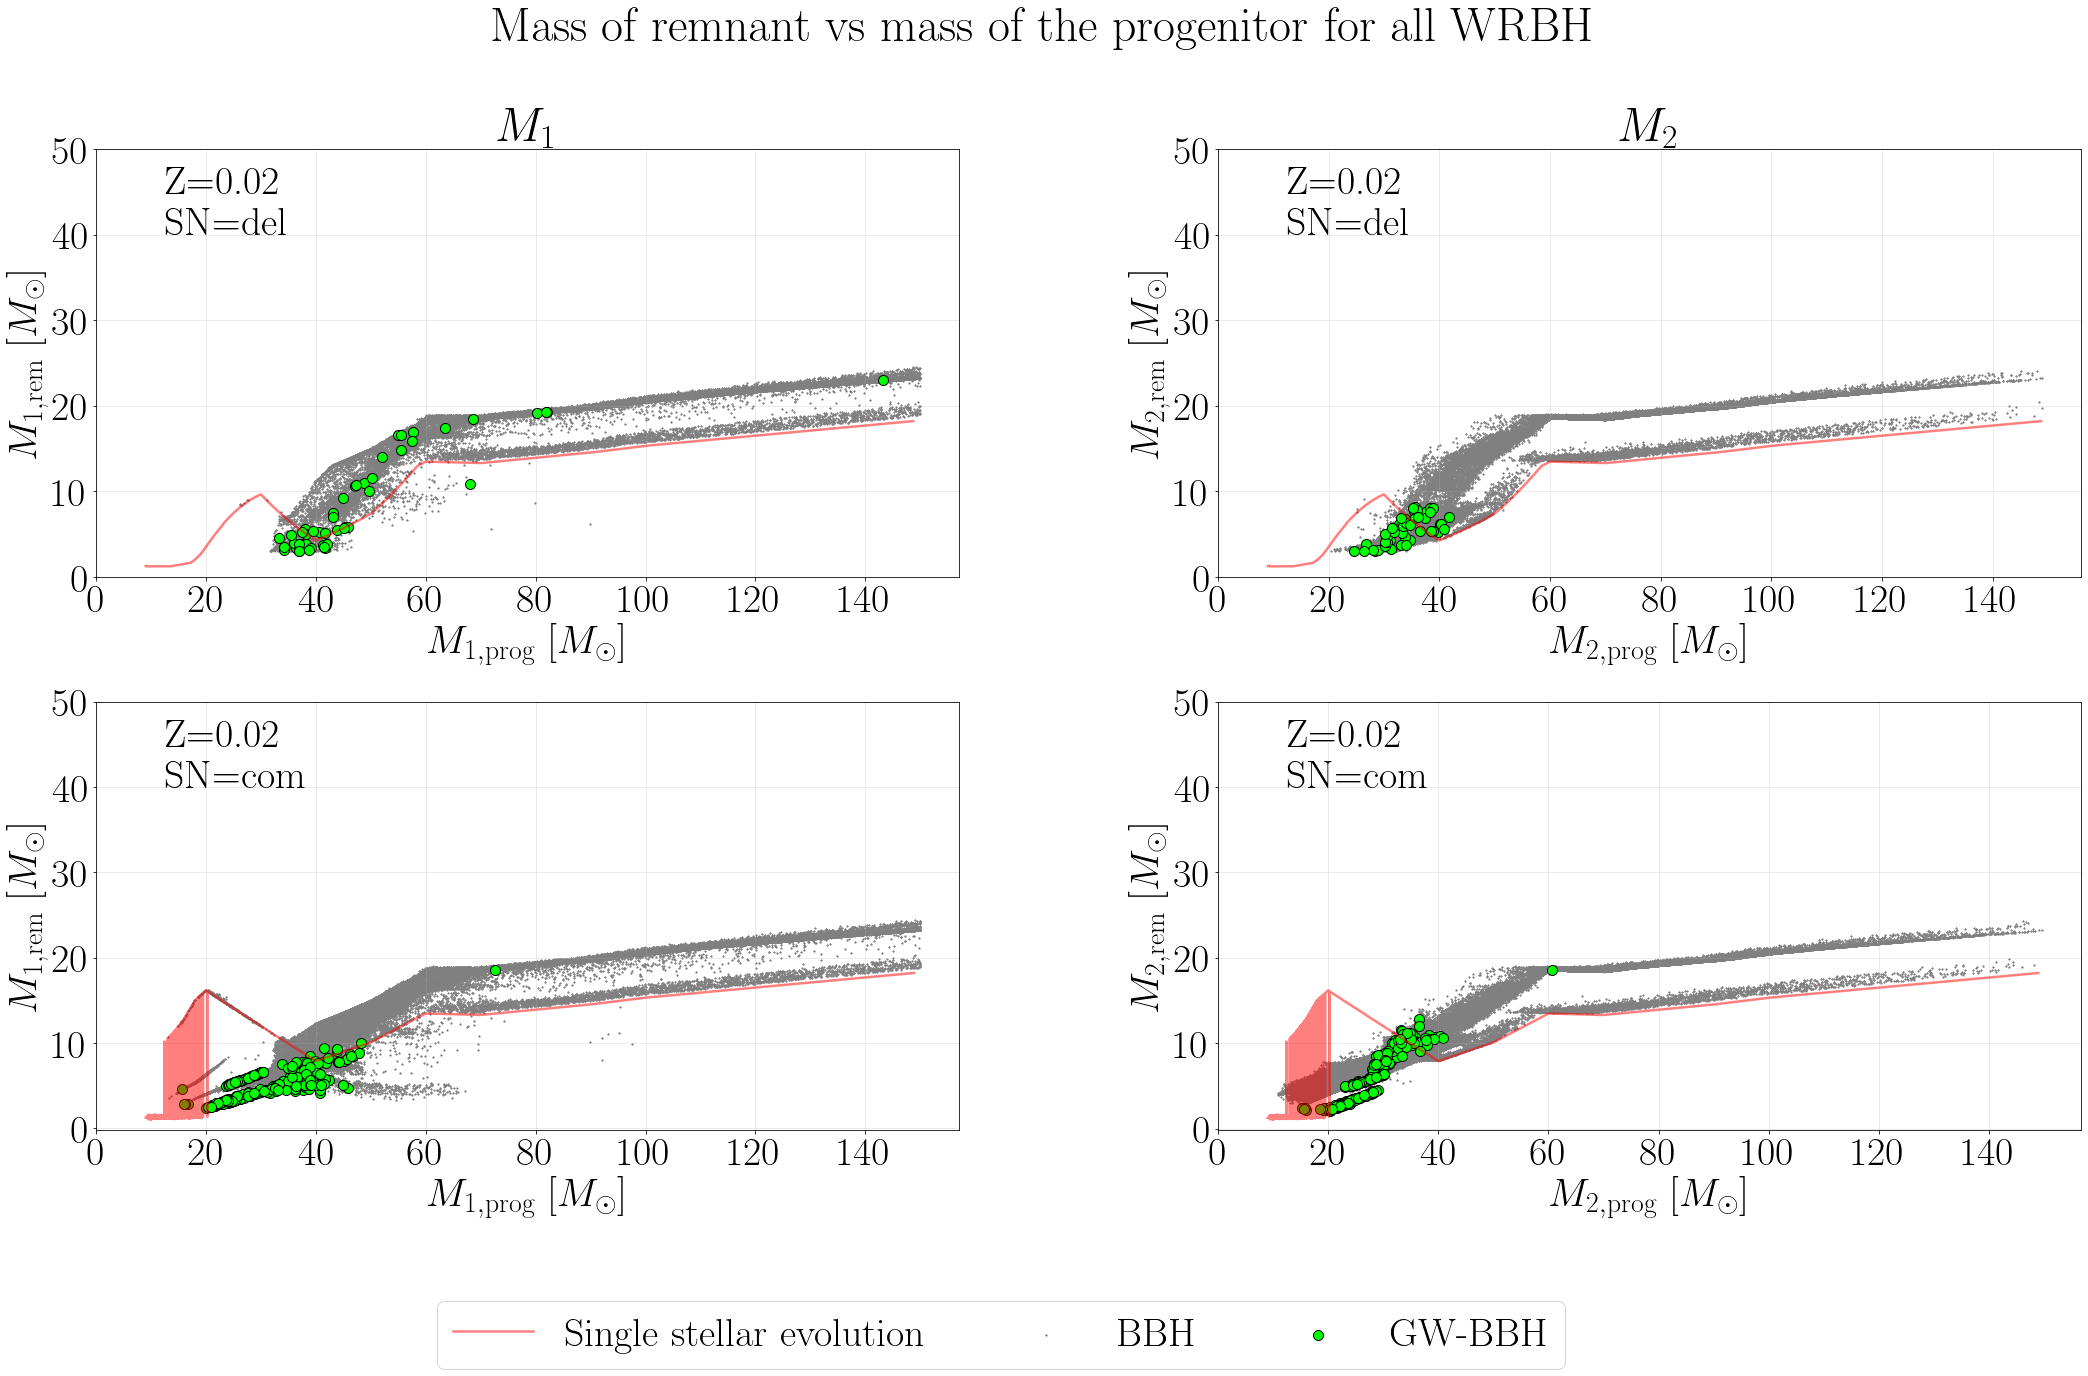

In [55]:
plottype = 'scatter_2D_mass_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Mass of remnant vs mass of the progenitor for all WRBH')

for Z,SN,ax in zip(Z_list,SN_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    path_df=f'./{path}/dataframes/'        # where processed dataframes are stored

    path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
    path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored
        
    p1,r1 = pd.read_csv(f'{path_df_prog}p_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_bound_WRBH.csv')
    p2,r2 = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

    singlestar = extract(SN,Z)

    prog_list = [p1,p2]  # progenitor list
    rem_list = [r1,r2]   # remnant list


    edges = [None,'k']
    colors = ['grey','lime']
    markers = ['*','o']
    sizes = [2,100]
    labels = ['BBH','GW-BBH']
    
    for prog,rem,marker,edge,color,size,label in zip(prog_list,rem_list,markers,edges,colors,sizes,labels):
        prog=prog.sort_values(by='ID')
        rem=rem.sort_values(by='ID')
        
        if (ax == axs[0][0]) | (ax == axs[1][0]):
            ax.scatter(prog[f'Mass_0'],rem[f'Mass_0'] , marker=marker, edgecolor = edge, c=color,s=size, label=label)
            ax.set_xlabel(r'$\displaystyle M_{1,\rm prog}~[M_\odot]$')
            ax.set_ylabel(r'$\displaystyle M_{1,\rm rem}~[M_\odot]$') 
            
        elif (ax == axs[0][1]) | (ax == axs[1][1]):
            ax.scatter(prog[f'Mass_1'],rem[f'Mass_1'] , marker=marker, edgecolor = edge, c=color,s=size, label=label)
            ax.set_xlabel(r'$\displaystyle M_{2,\rm prog}~[M_\odot]$')
            ax.set_ylabel(r'$\displaystyle M_{2,\rm rem}~[M_\odot]$') 
    
    ax.plot(singlestar['Mass'],singlestar['Mrem'], linestyle='solid', linewidth =lw, color='r', 
            alpha=0.5, label='Single stellar evolution')

    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.08, 0.8),xycoords='axes fraction')
    ax.set_xticks(np.arange(0, 150+1,20))
    ax.set_yticks(np.arange(0, 50+1,10))
    ax.grid(alpha=0.3)


axs[0][0].set_title(r'$M_1$')
axs[0][1].set_title(r'$M_2$')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3, bottom=0.2)

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

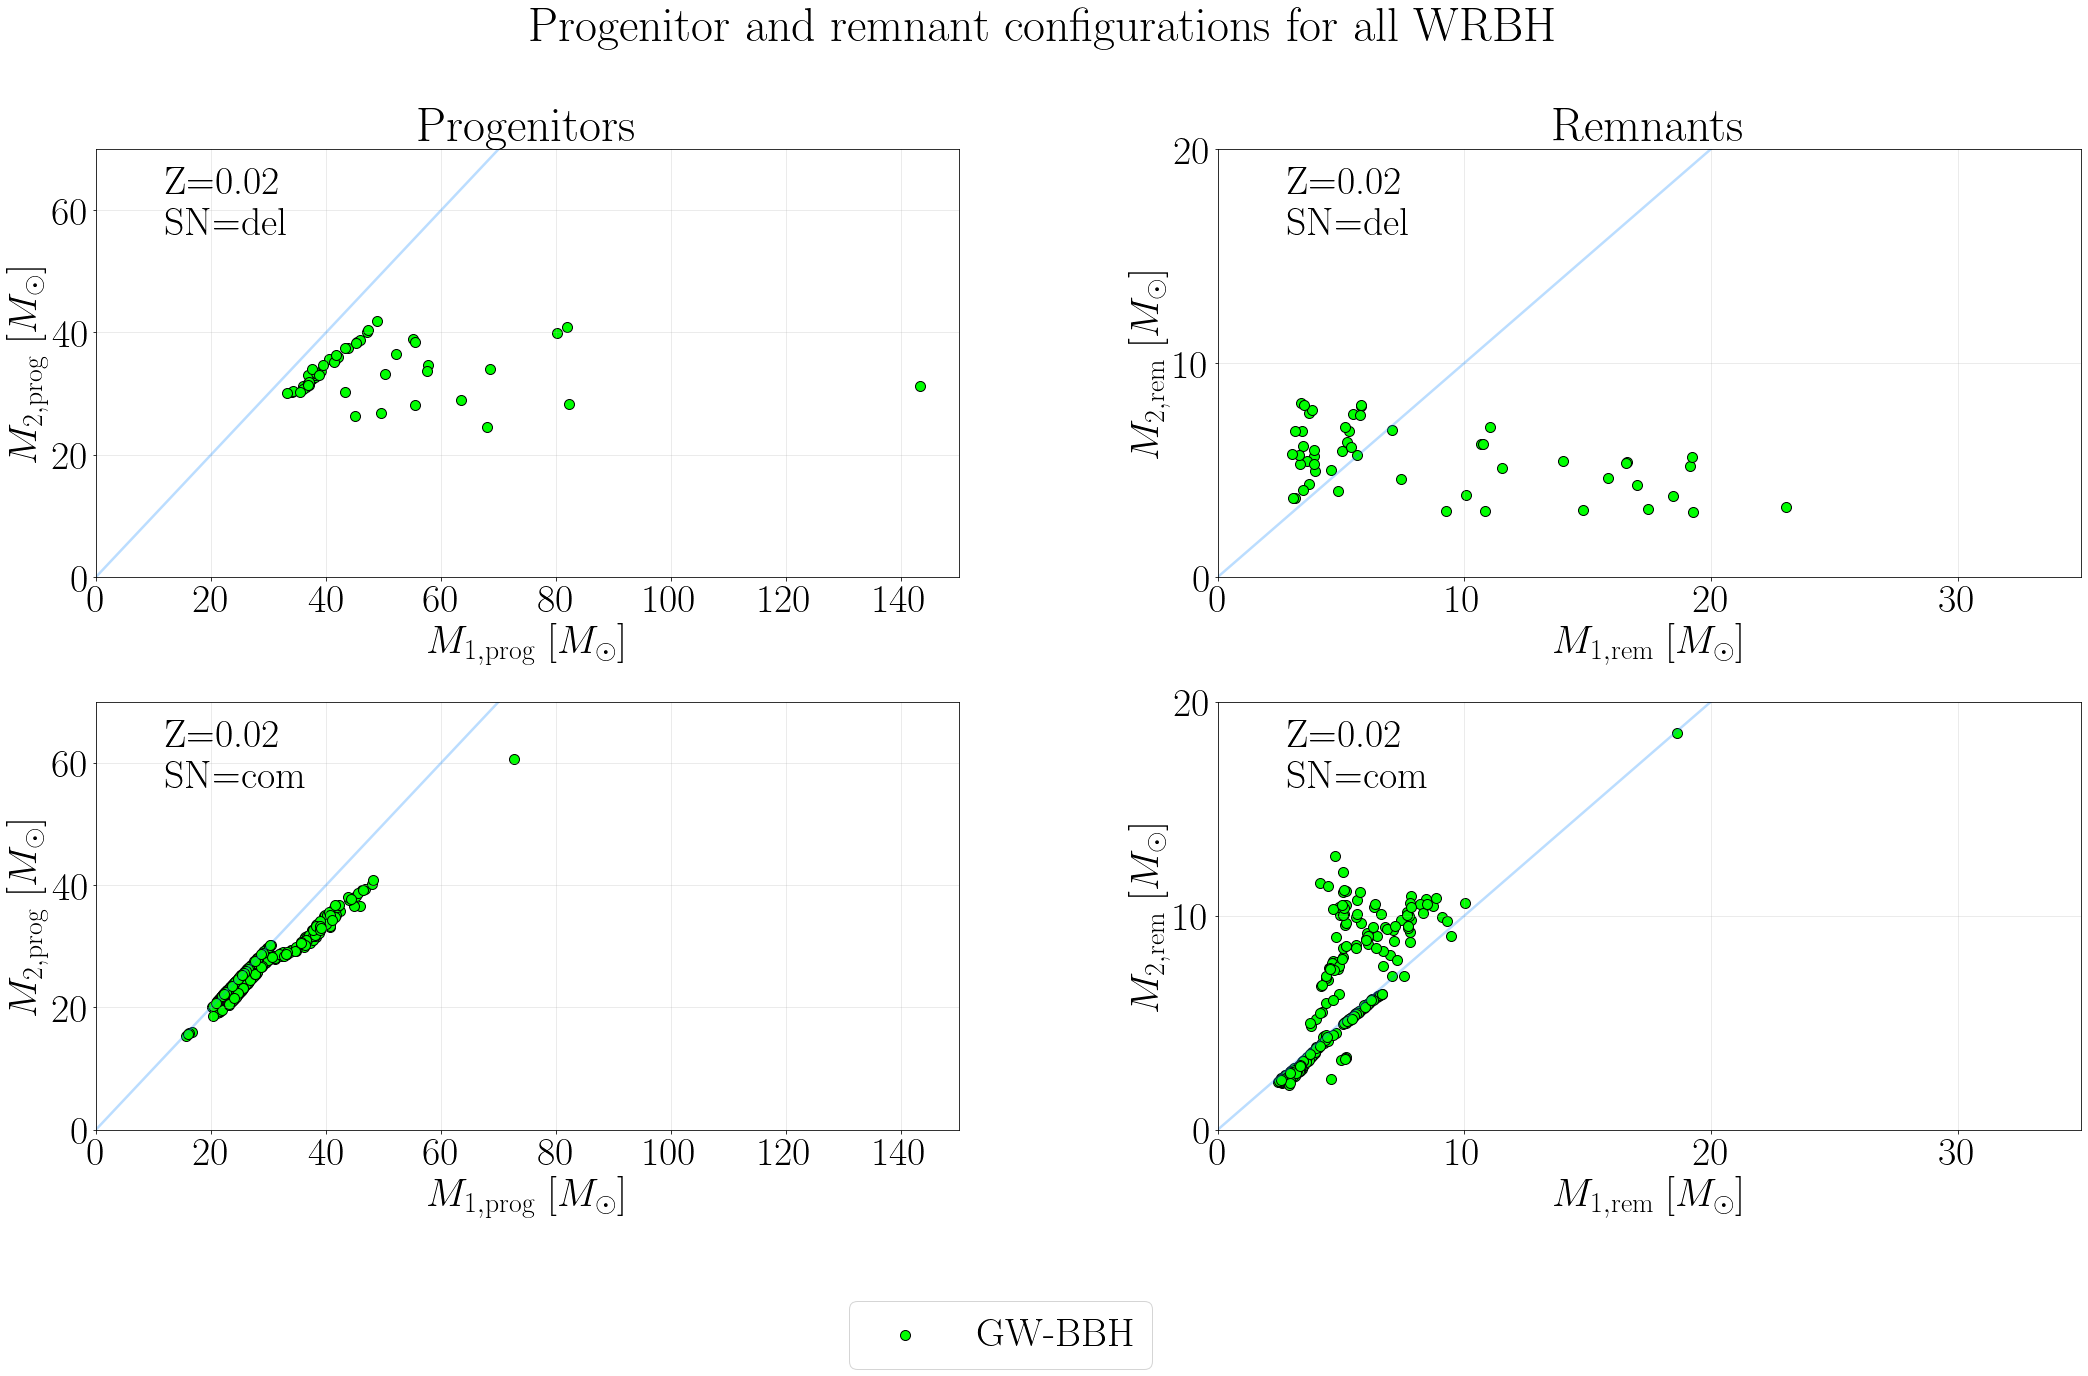

In [56]:
plottype = 'scatter_2D_mass_progrem_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Progenitor and remnant configurations for all WRBH')

for Z,SN,ax in zip(Z_list,SN_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    path_df=f'./{path}/dataframes/'        # where processed dataframes are stored

    path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
    path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored
        
    prog,rem = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

    prog=prog.sort_values(by='ID')
    rem=rem.sort_values(by='ID')
        
    if (ax == axs[0][0]) | (ax == axs[1][0]):
        ax.scatter(prog[f'Mass_0'],prog[f'Mass_1'] , marker='o', edgecolor = 'k', c='lime',s=100, label='GW-BBH')
        ax.set_xlabel(r'$\displaystyle M_{1,\rm prog}~[M_\odot]$')
        ax.set_ylabel(r'$\displaystyle M_{2,\rm prog}~[M_\odot]$') 
        ax.set_xticks(np.arange(0, 150+1,20))
        ax.set_yticks(np.arange(0, 70+1,20))
        ax.set_xlim(0,150)
        ax.set_ylim(0,70)

    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        ax.scatter(rem[f'Mass_0'],rem[f'Mass_1'] , marker='o', edgecolor = 'k', c='lime',s=100, label='GW-BBH')
        ax.set_xlabel(r'$\displaystyle M_{1,\rm rem}~[M_\odot]$')
        ax.set_ylabel(r'$\displaystyle M_{2,\rm rem}~[M_\odot]$') 
        ax.set_xticks(np.arange(0, 35+1,10))
        ax.set_yticks(np.arange(0, 20+1,10))
        ax.set_xlim(0,35)
        ax.set_ylim(0,20)
    
    x = np.arange(0,150,0.5)
    ax.plot(x,x,color='dodgerblue',alpha=0.3,linewidth=lw)
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.08, 0.8),xycoords='axes fraction')
    ax.grid(alpha=0.3)


axs[0][0].set_title(r'Progenitors')
axs[0][1].set_title(r'Remnants')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   
plt.tight_layout()
fig.subplots_adjust(wspace = 0.3, bottom=0.2)

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

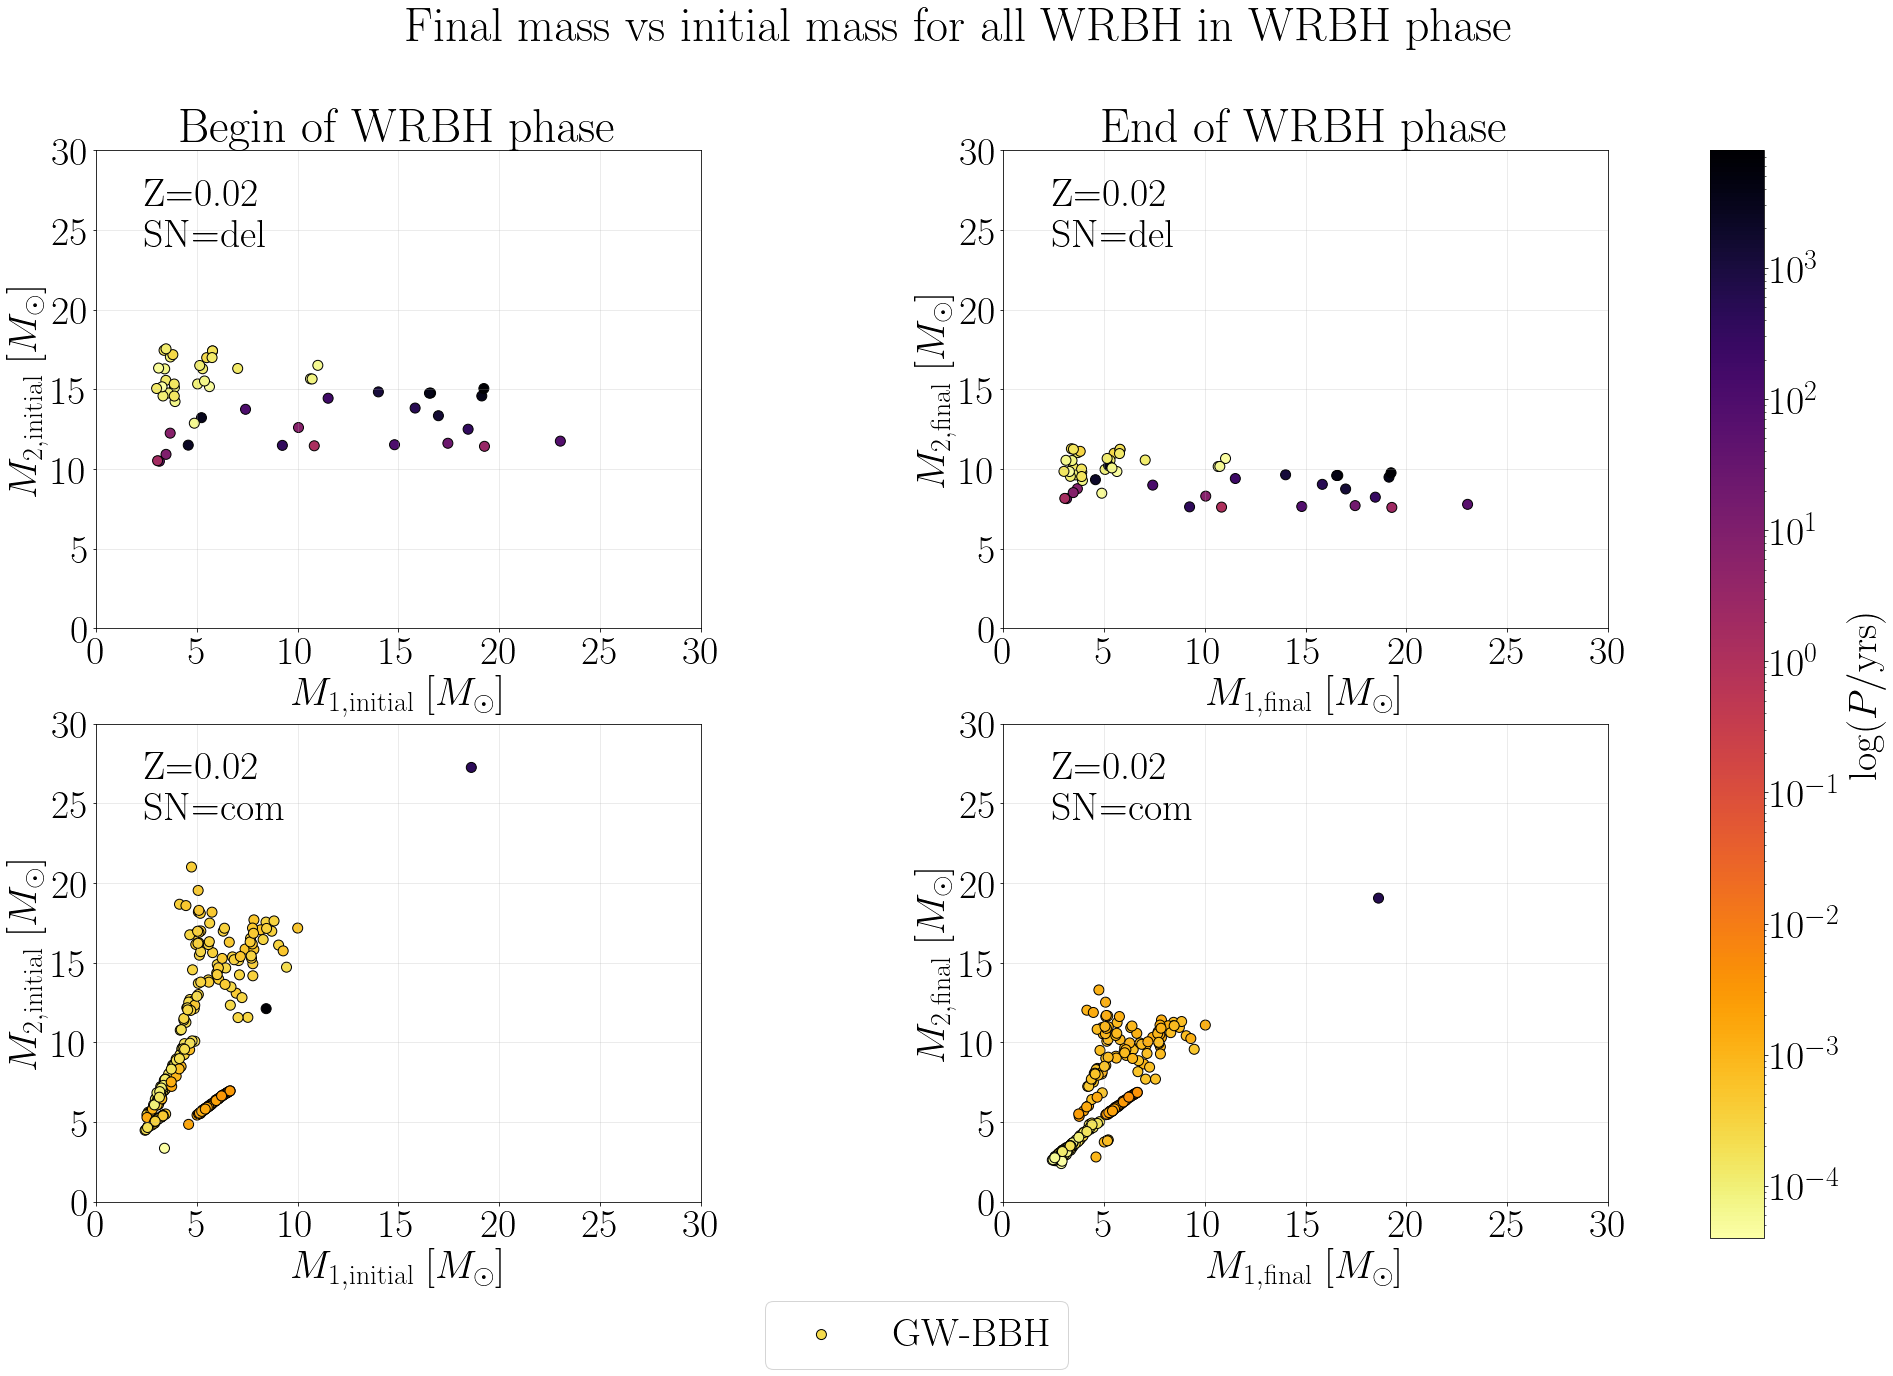

In [57]:
import matplotlib.colors as colors
plottype = 'scatter_2D_mass_per_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Final mass vs initial mass for all WRBH in WRBH phase')
cmap= cm.get_cmap('inferno_r')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
        
    # initial and final state of WRBH
    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    df1,df2 = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')    


    df1=df1.sort_values(by='ID')
    df2=df2.sort_values(by='ID')

    if (ax == axs[0][0]) | (ax == axs[1][0]):
        cs = ax.scatter(df1['Mass_0'],df1['Mass_1'] , marker='o', edgecolor = 'k', c=df1['Period'],cmap=cmap,norm=colors.LogNorm(),s=100, label='GW-BBH')
        ax.set_xlabel(r'$\displaystyle M_{1,\rm initial}~[M_\odot]$')
        ax.set_ylabel(r'$\displaystyle M_{2,\rm initial}~[M_\odot]$') 

    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        cs = ax.scatter(df2['Mass_0'],df2['Mass_1'] , marker='o', edgecolor = 'k', c=df2['Period'],cmap=cmap,norm=colors.LogNorm(),s=100, label='GW-BBH')
        ax.set_xlabel(r'$\displaystyle M_{1,\rm final}~[M_\odot]$')
        ax.set_ylabel(r'$\displaystyle M_{2,\rm final}~[M_\odot]$') 

    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.08, 0.8),xycoords='axes fraction')
    ax.set_xticks(np.arange(0, 30+1,5))
    ax.set_yticks(np.arange(0, 30+1,5))
    ax.grid(alpha=0.3)

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'$\displaystyle \log(P/\rm yrs)$')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title('Begin of WRBH phase')
axs[0][1].set_title('End of WRBH phase')
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15, left=0.1, right=0.8,wspace = 0.5 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

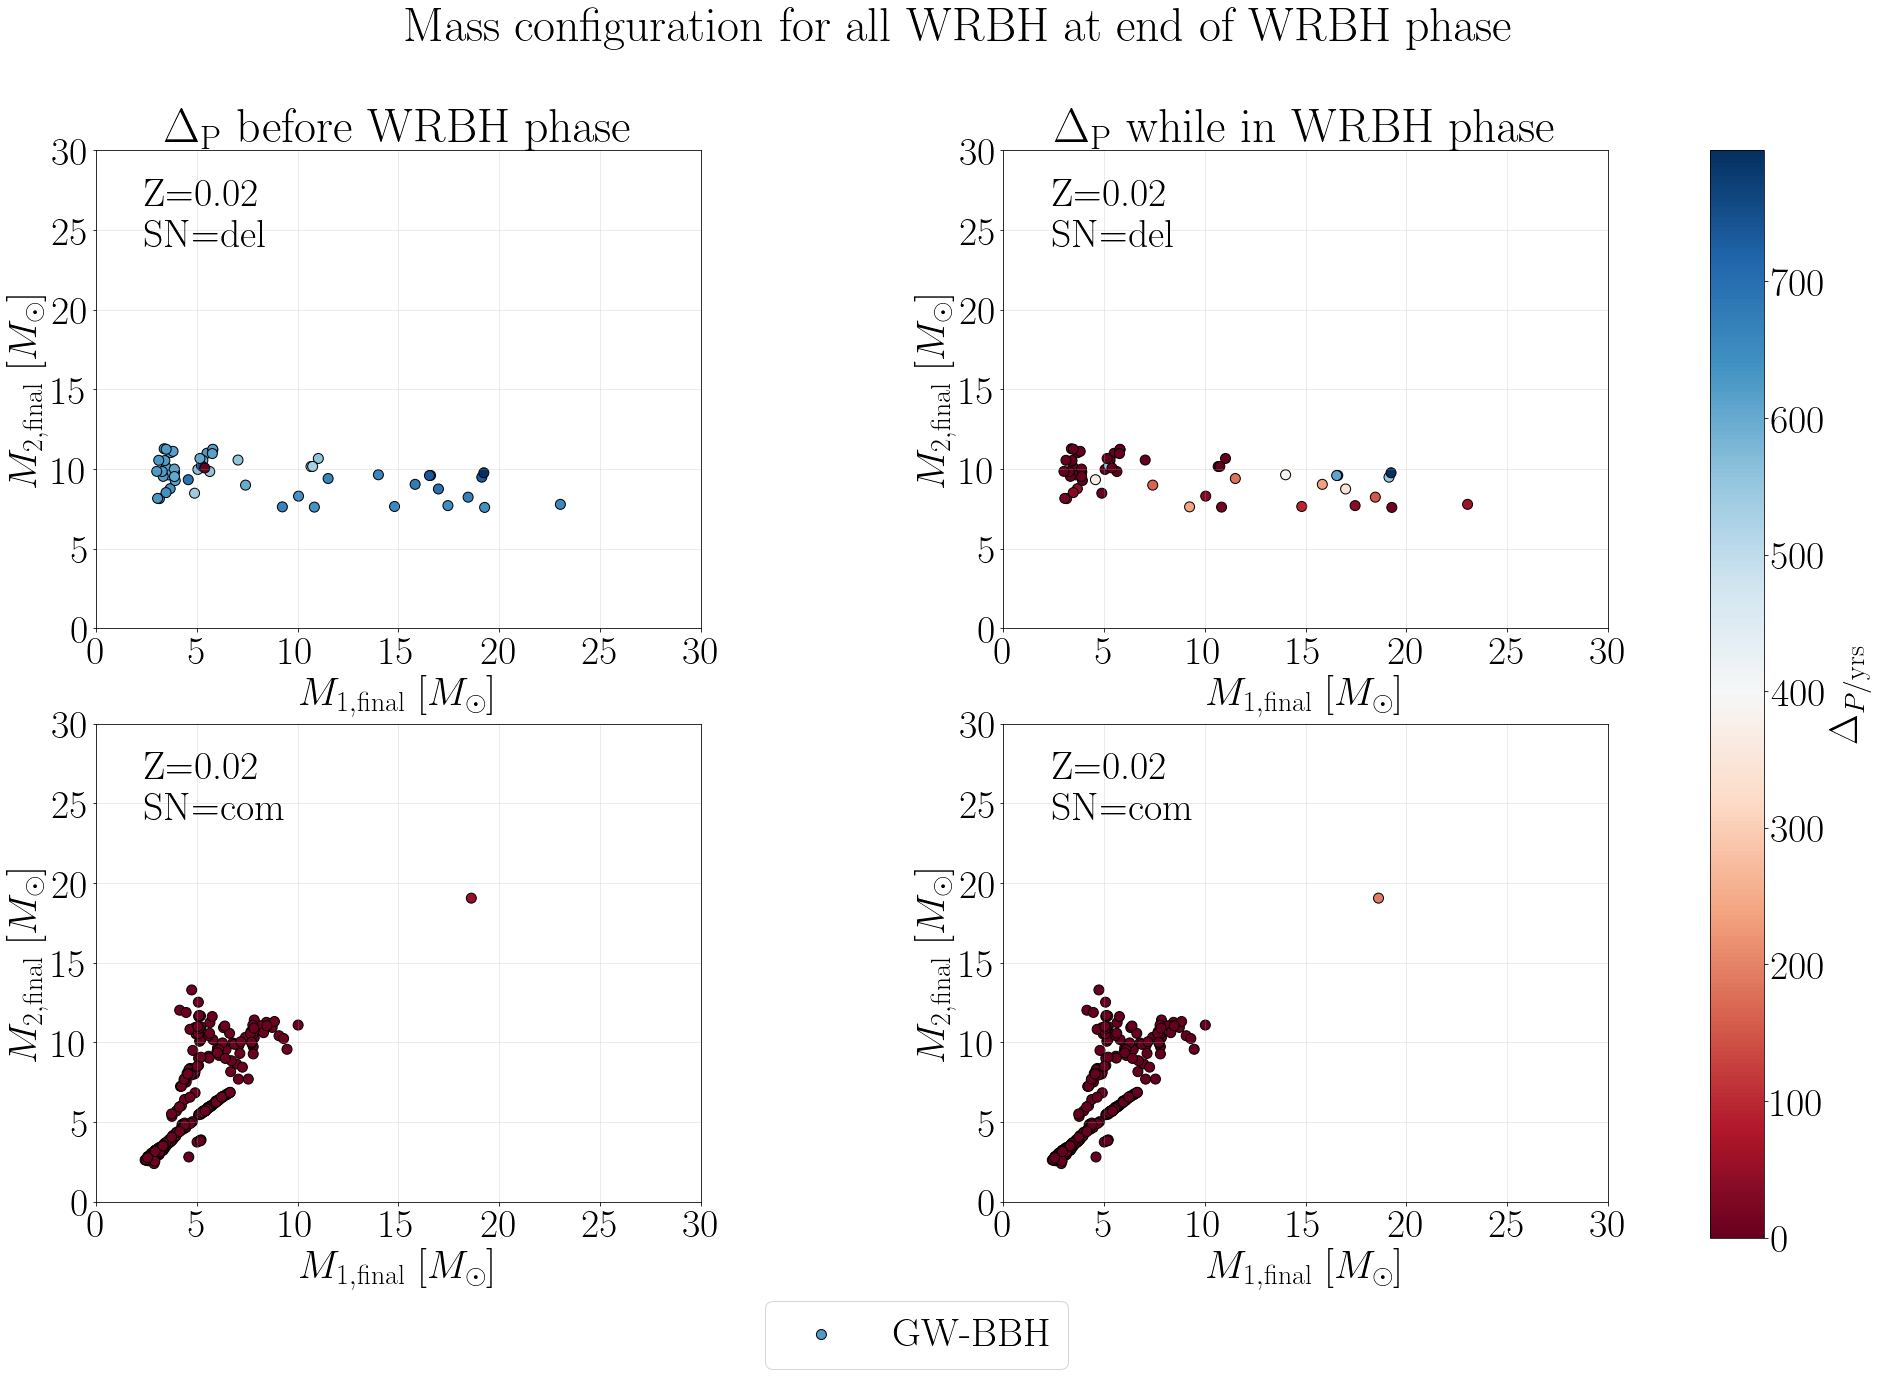

In [58]:
plottype = 'scatter_2D_mass_deltaper_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Mass configuration for all WRBH at end of WRBH phase')
cmap= cm.get_cmap('RdBu')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    # progenitors and remnants of WRBH
    path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
    
    p = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv')
        
    # initial and final state of WRBH
    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')    
    
    # make sure that both mass-coordinates refer to the same binary
    p=p.sort_values(by='ID')
    i=i.sort_values(by='ID')
    f=f.sort_values(by='ID')
    
    # calculate difference in periods
    delta_i_p = i['Period'] - p['Period']
    delta_f_i = f['Period'] - i['Period']

    if (ax == axs[0][0]) | (ax == axs[1][0]):
        cs = ax.scatter(f['Mass_0'],f['Mass_1'] , marker='o', edgecolor = 'k', c=delta_i_p,cmap=cmap,s=100, label='GW-BBH')
        ax.set_xlabel(r'$\displaystyle M_{1,\rm final}~[M_\odot]$')
        ax.set_ylabel(r'$\displaystyle M_{2,\rm final}~[M_\odot]$') 

    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        cs = ax.scatter(f['Mass_0'],f['Mass_1'] , marker='o', edgecolor = 'k', c=delta_f_i,cmap=cmap,s=100, label='GW-BBH')
        ax.set_xlabel(r'$\displaystyle M_{1,\rm final}~[M_\odot]$')
        ax.set_ylabel(r'$\displaystyle M_{2,\rm final}~[M_\odot]$') 

    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.08, 0.8),xycoords='axes fraction')
    ax.set_xticks(np.arange(0, 30+1,5))
    ax.set_yticks(np.arange(0, 30+1,5))
    ax.grid(alpha=0.3)

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'$\displaystyle \Delta_{P/\rm yrs}$')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title(r'$\Delta_{\rm P}$ before WRBH phase')
axs[0][1].set_title(r'$\Delta_{\rm P}$ while in WRBH phase')
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15, left=0.1, right=0.8,wspace = 0.5 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

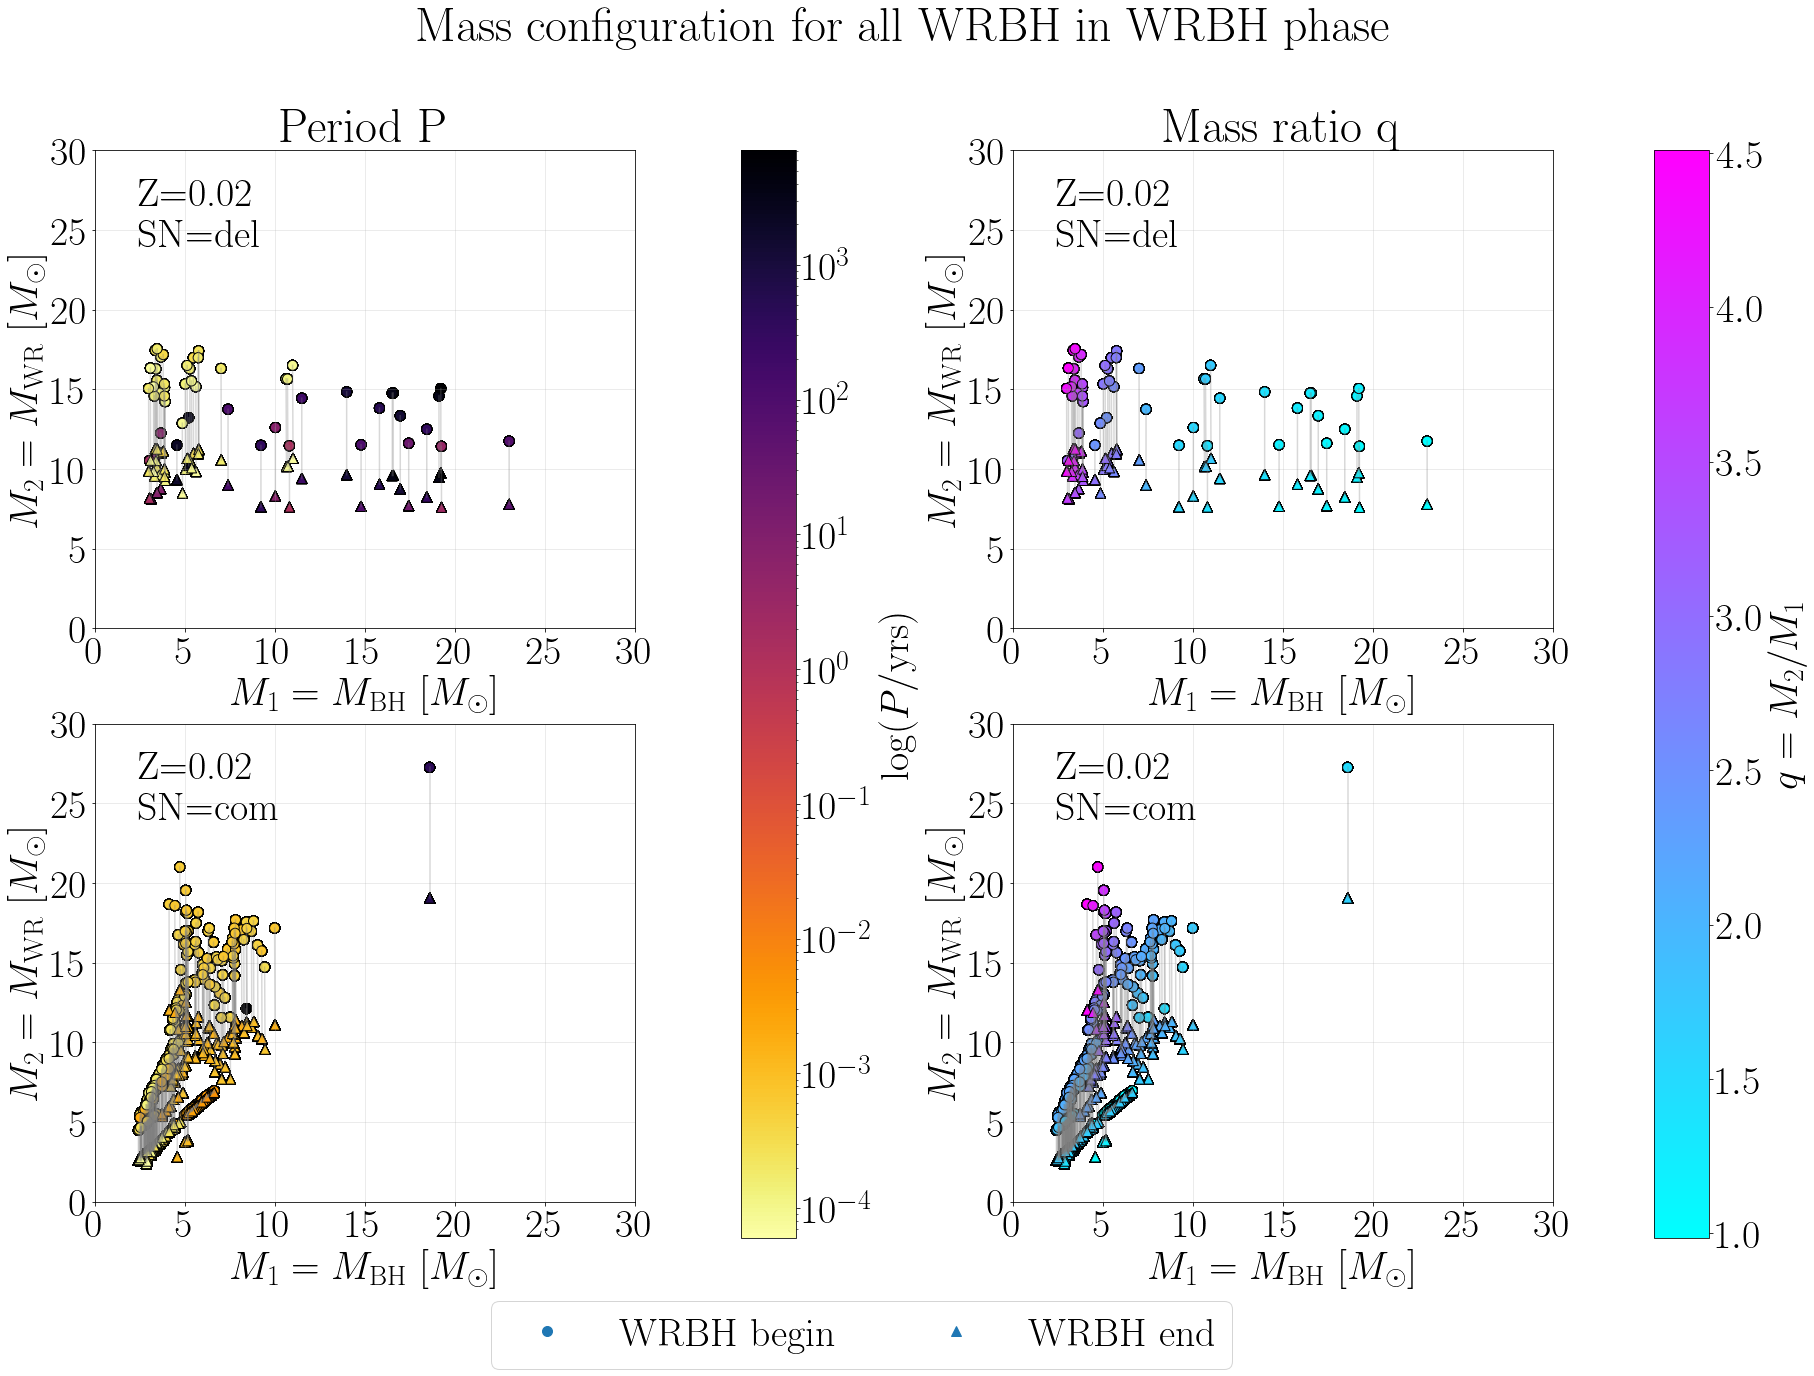

In [59]:
plottype = 'scatter_2D_plot_mass_per_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Mass configuration for all WRBH in WRBH phase')
cmapinf= cm.get_cmap('inferno_r')
cmapcool= cm.get_cmap('cool')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
        
    # initial and final state of WRBH
    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv') 
    
    # prepare the plot
    conc = pd.concat([i,f]).sort_values(['ID','BWorldtime'])
    list_ID = i['ID'].to_list()
    
    for ID in list_ID:
        dfID = conc.loc[conc['ID']==ID]   # select subset of dataframe
        ax.plot(dfID['Mass_0'],dfID['Mass_1'] ,color='grey',alpha=0.3)
        if (ax == axs[0][0]) | (ax == axs[1][0]):
            csper = ax.scatter(i['Mass_0'],i['Mass_1'] , marker='o', edgecolor = 'k', c=i['Period'],cmap=cmapinf,norm=colors.LogNorm(),s=100)
            ax.scatter(f['Mass_0'],f['Mass_1'] , marker='^', edgecolor = 'k', c=f['Period'],cmap=cmapinf,norm=colors.LogNorm(),s=100)
        elif (ax == axs[0][1]) | (ax == axs[1][1]):
            csq = ax.scatter(i['Mass_0'],i['Mass_1'] , marker='o', edgecolor = 'k', c=i['Mass_1']/i['Mass_0'],cmap=cmapcool,s=100)
            ax.scatter(f['Mass_0'],f['Mass_1'] , marker='^', edgecolor = 'k', c=f['Mass_1']/f['Mass_0'],cmap=cmapcool,s=100)

        ax.set_xlabel(r'$\displaystyle M_{1}=M_{\rm BH}~[M_\odot]$')
        ax.set_ylabel(r'$\displaystyle M_{2}=M_{\rm WR}~[M_\odot]$') 


    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.08, 0.8),xycoords='axes fraction')
    ax.set_xticks(np.arange(0, 30+1,5))
    ax.set_yticks(np.arange(0, 30+1,5))
    ax.grid(alpha=0.3)


    
cbarper=plt.colorbar(csper, ax=axs[:,0],orientation='vertical')
cbarper.set_label(r'$\displaystyle \log(P/\rm yrs)$')

cbarq=plt.colorbar(csq, ax=axs[:,1],orientation='vertical')
cbarq.set_label(r'$\displaystyle q = M_2/M_1$')


axs[0][0].set_title('Period P')
axs[0][1].set_title('Mass ratio q')
circle = mlines.Line2D([], [], marker='o', linestyle='None', markersize=10, label='WRBH begin')
triangle = mlines.Line2D([], [], marker='^', linestyle='None', markersize=10, label='WRBH end')
#handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles=[circle,triangle], loc='lower center', ncol=2, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15, right=0.8,wspace = 0.7 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

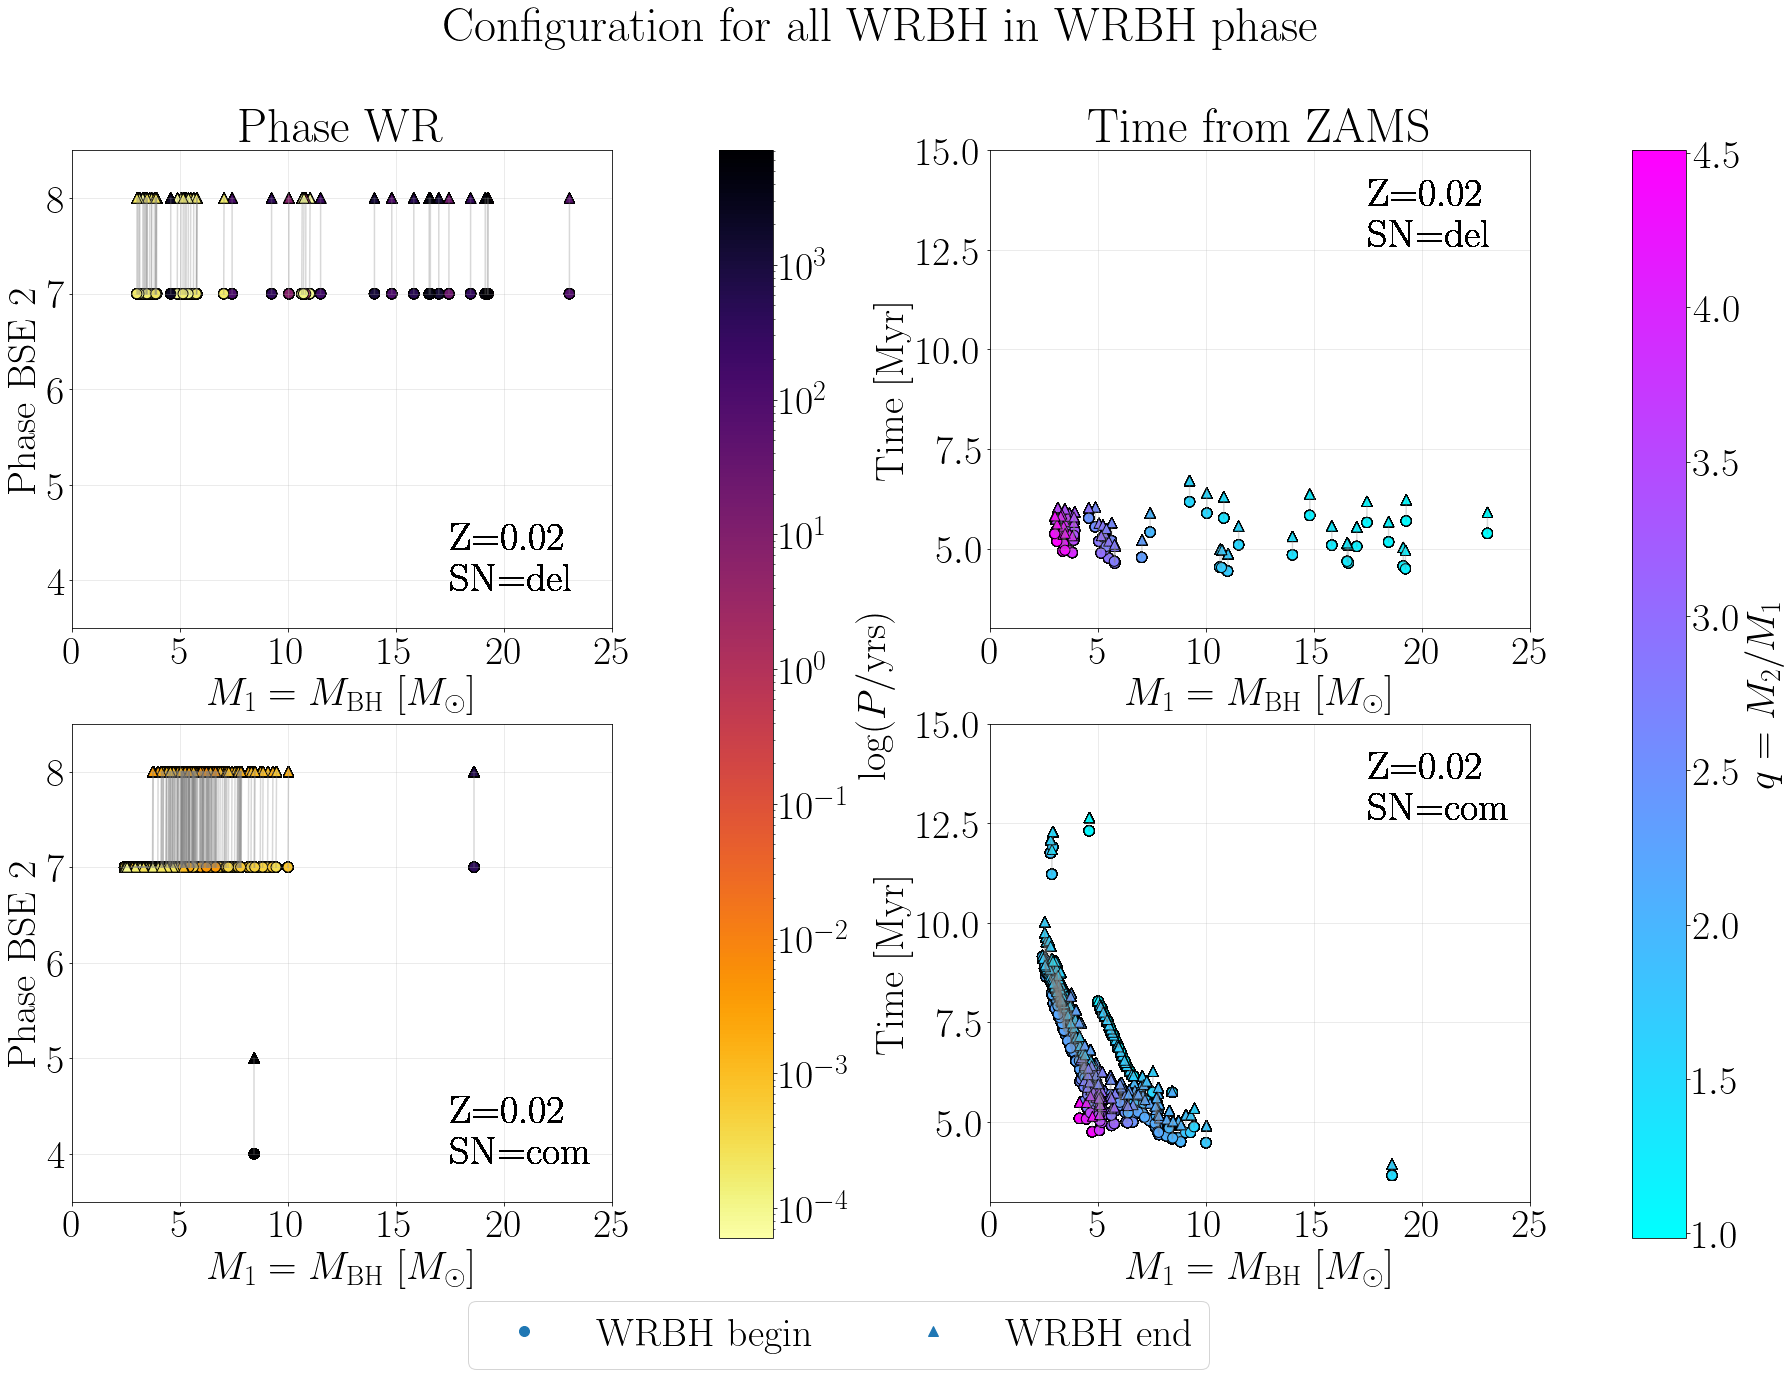

In [60]:
plottype = 'scatter_2D_plot_phase_time_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Configuration for all WRBH in WRBH phase')
cmapinf= cm.get_cmap('inferno_r')
cmapcool= cm.get_cmap('cool')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
        
    # initial and final state of WRBH
    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv') 
    
    # prepare the plot
    conc = pd.concat([i,f]).sort_values(['ID','BWorldtime'])
    list_ID = i['ID'].to_list()
    
    for ID in list_ID:
        dfID = conc.loc[conc['ID']==ID]   # select subset of dataframe
        if (ax == axs[0][0]) | (ax == axs[1][0]):
            ax.plot(dfID['Mass_0'],dfID['PhaseBSE_1'] ,color='grey',alpha=0.3)
            csper = ax.scatter(i['Mass_0'],i['PhaseBSE_1'] , marker='o', edgecolor = 'k', c=i['Period'],cmap=cmapinf,norm=colors.LogNorm(),s=100)
            ax.scatter(f['Mass_0'],f['PhaseBSE_1'] , marker='^', edgecolor = 'k', c=f['Period'],cmap=cmapinf,norm=colors.LogNorm(),s=100)
        
            ax.set_xlabel(r'$\displaystyle M_{1}=M_{\rm BH}~[M_\odot]$')
            ax.set_ylabel(r'Phase BSE 2') 
            ax.set_ylim(3.5,8.5)
            ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.7, 0.08),xycoords='axes fraction')
        elif (ax == axs[0][1]) | (ax == axs[1][1]):
            ax.plot(dfID['Mass_0'],dfID['BWorldtime'] ,color='grey',alpha=0.3)
            csq = ax.scatter(i['Mass_0'],i['BWorldtime'] , marker='o', edgecolor = 'k', c=i['Mass_1']/i['Mass_0'],cmap=cmapcool,s=100)
            ax.scatter(f['Mass_0'],f['BWorldtime'] , marker='^', edgecolor = 'k', c=f['Mass_1']/f['Mass_0'],cmap=cmapcool,s=100)
            
            ax.set_xlabel(r'$\displaystyle M_{1}=M_{\rm BH}~[M_\odot]$')
            ax.set_ylabel(r'Time [Myr]') 
            ax.set_ylim(3,15)
            ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.7, 0.8),xycoords='axes fraction')
    
    ax.set_xticks(np.arange(0, 25+1,5))
#     ax.set_yticks(np.arange(0, 30+1,5))
    ax.grid(alpha=0.3)


    
cbarper=plt.colorbar(csper, ax=axs[:,0],orientation='vertical')
cbarper.set_label(r'$\displaystyle \log(P/\rm yrs)$')

cbarq=plt.colorbar(csq, ax=axs[:,1],orientation='vertical')
cbarq.set_label(r'$\displaystyle q = M_2/M_1$')


axs[0][0].set_title('Phase WR')
axs[0][1].set_title('Time from ZAMS')
circle = mlines.Line2D([], [], marker='o', linestyle='None', markersize=10, label='WRBH begin')
triangle = mlines.Line2D([], [], marker='^', linestyle='None', markersize=10, label='WRBH end')
#handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles=[circle,triangle], loc='lower center', ncol=2, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15, right=0.8,wspace = 0.7 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

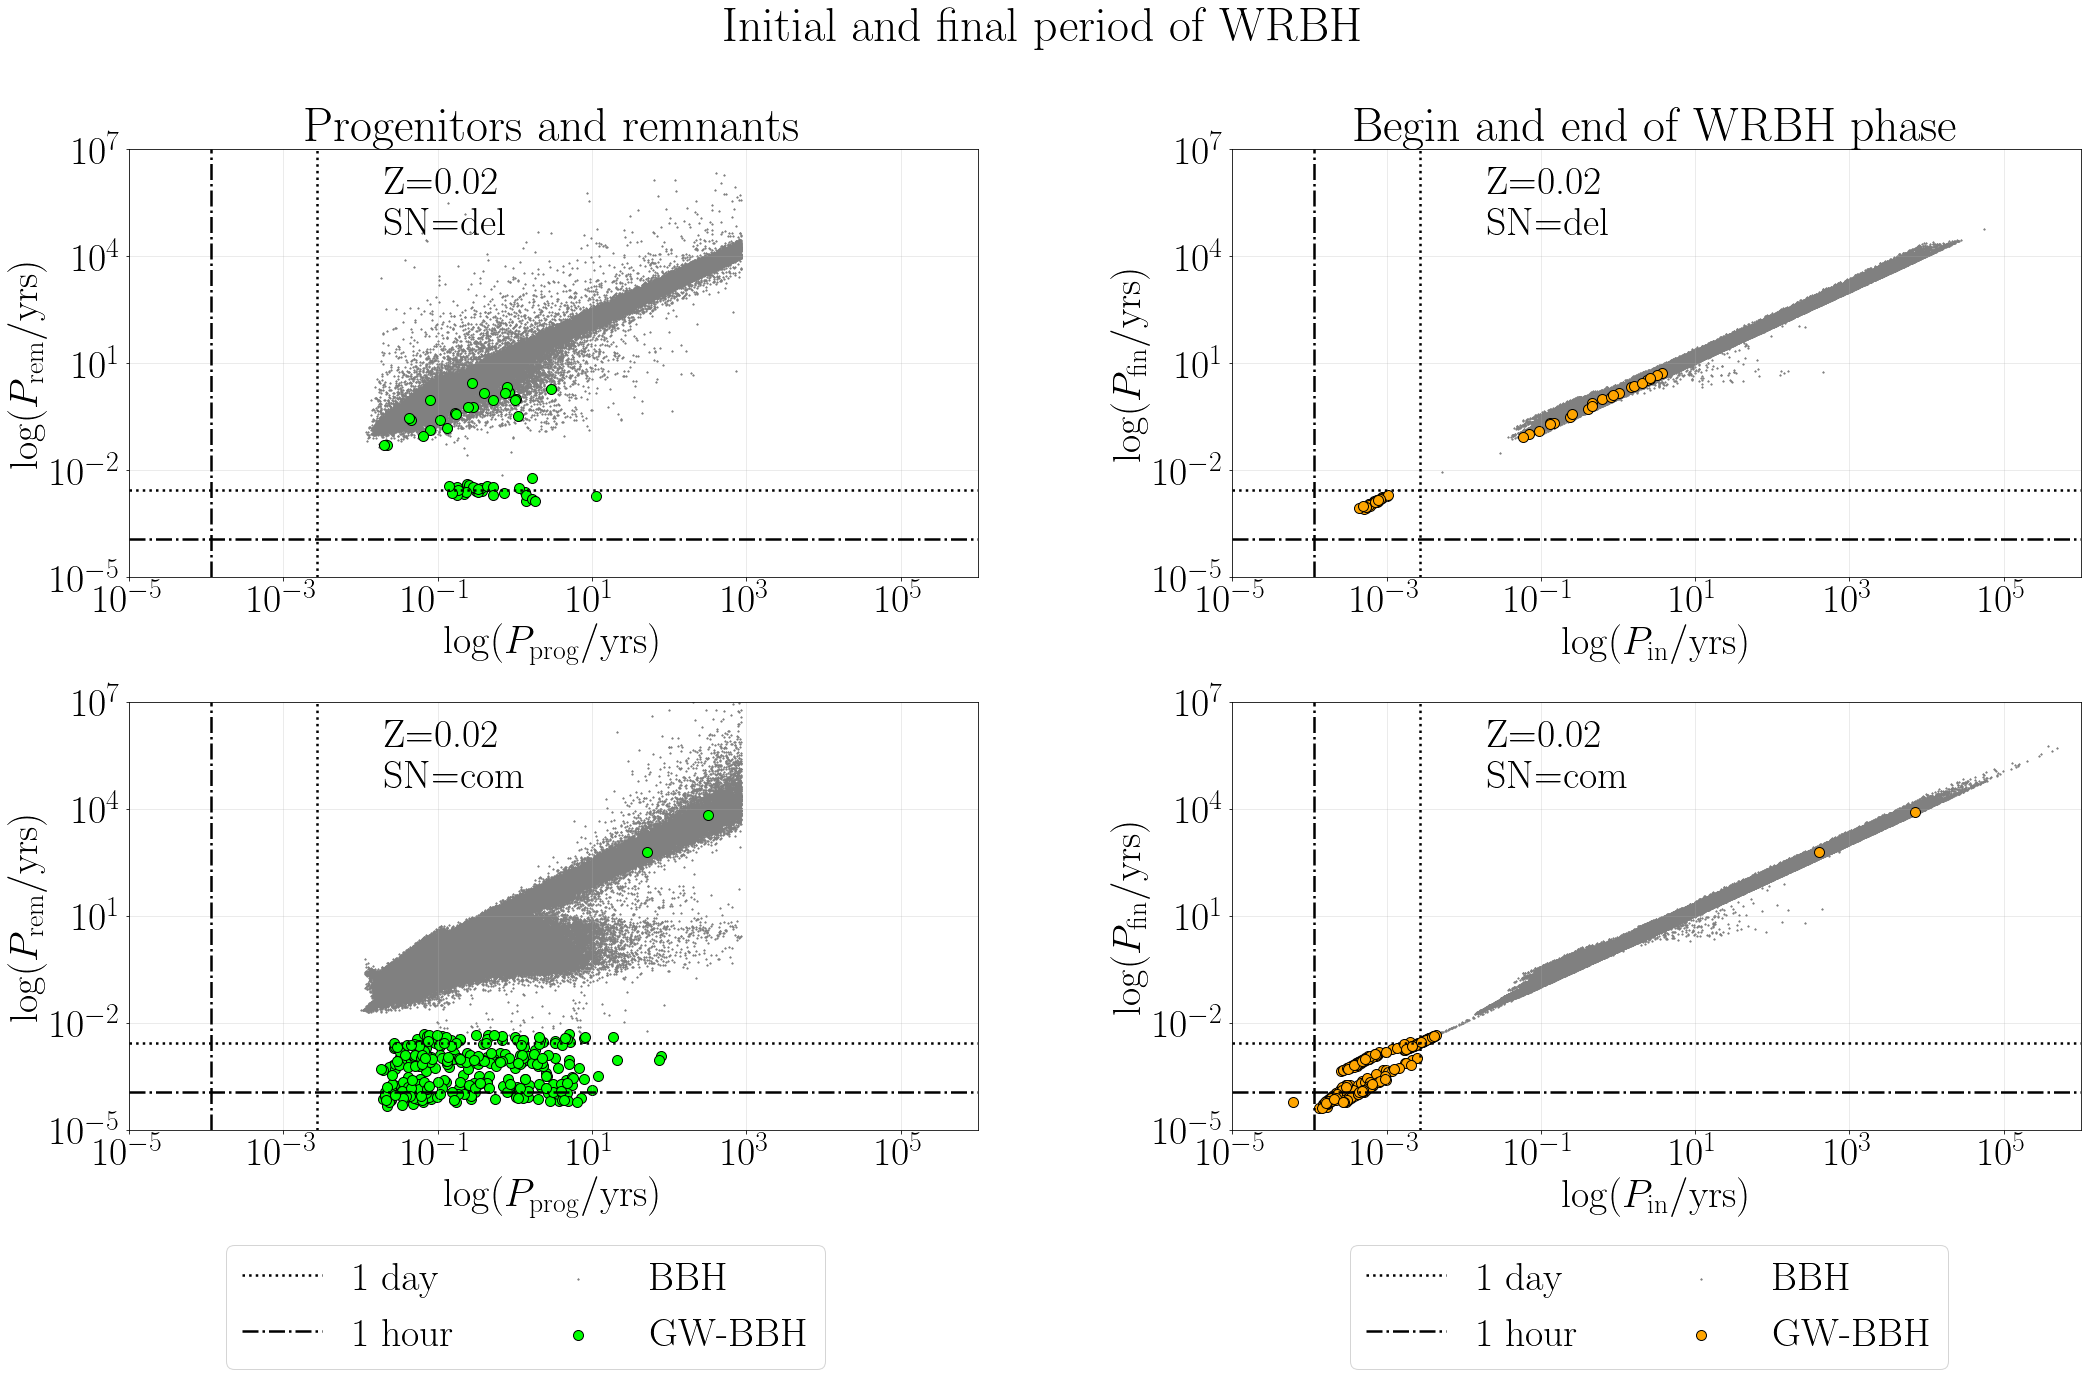

In [61]:
plottype = 'scatter2D_per_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Initial and final period of WRBH')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###
    # progenitors and remnants
    if prefix == 'pr':
        path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
        path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored
        
        p1,r1 = pd.read_csv(f'{path_df_prog}p_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

        colors=['grey','lime']
        
        ax.set_xlabel(r'$\displaystyle \log(P_{\rm prog}/\rm yrs)$')
        ax.set_ylabel(r'$\displaystyle \log(P_{\rm rem}/\rm yrs)$')
        
    # initial and final state of WRBH
    elif prefix == 'if':
        path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
        path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored
        
        p1,r1 = pd.read_csv(f'{path_df_in}i_BHBH_bound_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_bound_WRBH.csv')
        p2,r2 = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

        colors=['grey','orange']
        
        ax.set_xlabel(r'$\displaystyle \log(P_{\rm in}/\rm yrs)$')
        ax.set_ylabel(r'$\displaystyle \log(P_{\rm fin}/\rm yrs)$')
    

    list_1 = [p1,p2]  # list of initial values
    list_2 = [r1,r2]   # list of final values

    edges = [None,'k']
    markers = ['*','o']
    sizes = [2,100]
    labels=['BBH','GW-BBH']
    
    for df1,df2,marker,edge,color,size,label in zip(list_1,list_2,markers,edges,colors,sizes,labels):
        # make sure that both period-coordinates refer to the same binary
        df1=df1.sort_values(by='ID')
        df2=df2.sort_values(by='ID')
        ax.scatter(df1['Period'],df2['Period'] , marker=marker, edgecolor = edge, c=color,s=size, label=label)

    ax.axhline(y=1./365, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day in yrs unit of measure
    ax.axhline(y=1./(365*24), linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour in yrs unit of measure
    
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
 
    
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.3, 0.8),xycoords='axes fraction')
    ax.set_xlim(xmin=1e-5, xmax=1e6) 
    ax.set_ylim(ymin=1e-5, ymax=1e7)    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

axs[0][0].set_title('Progenitors and remnants')
handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.26,0.02))   # 0.48

axs[0][1].set_title('Begin and end of WRBH phase')
handles, labels = axs[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.78,0.02))   

plt.tight_layout()
fig.subplots_adjust(wspace = 0.3,bottom=0.2)

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

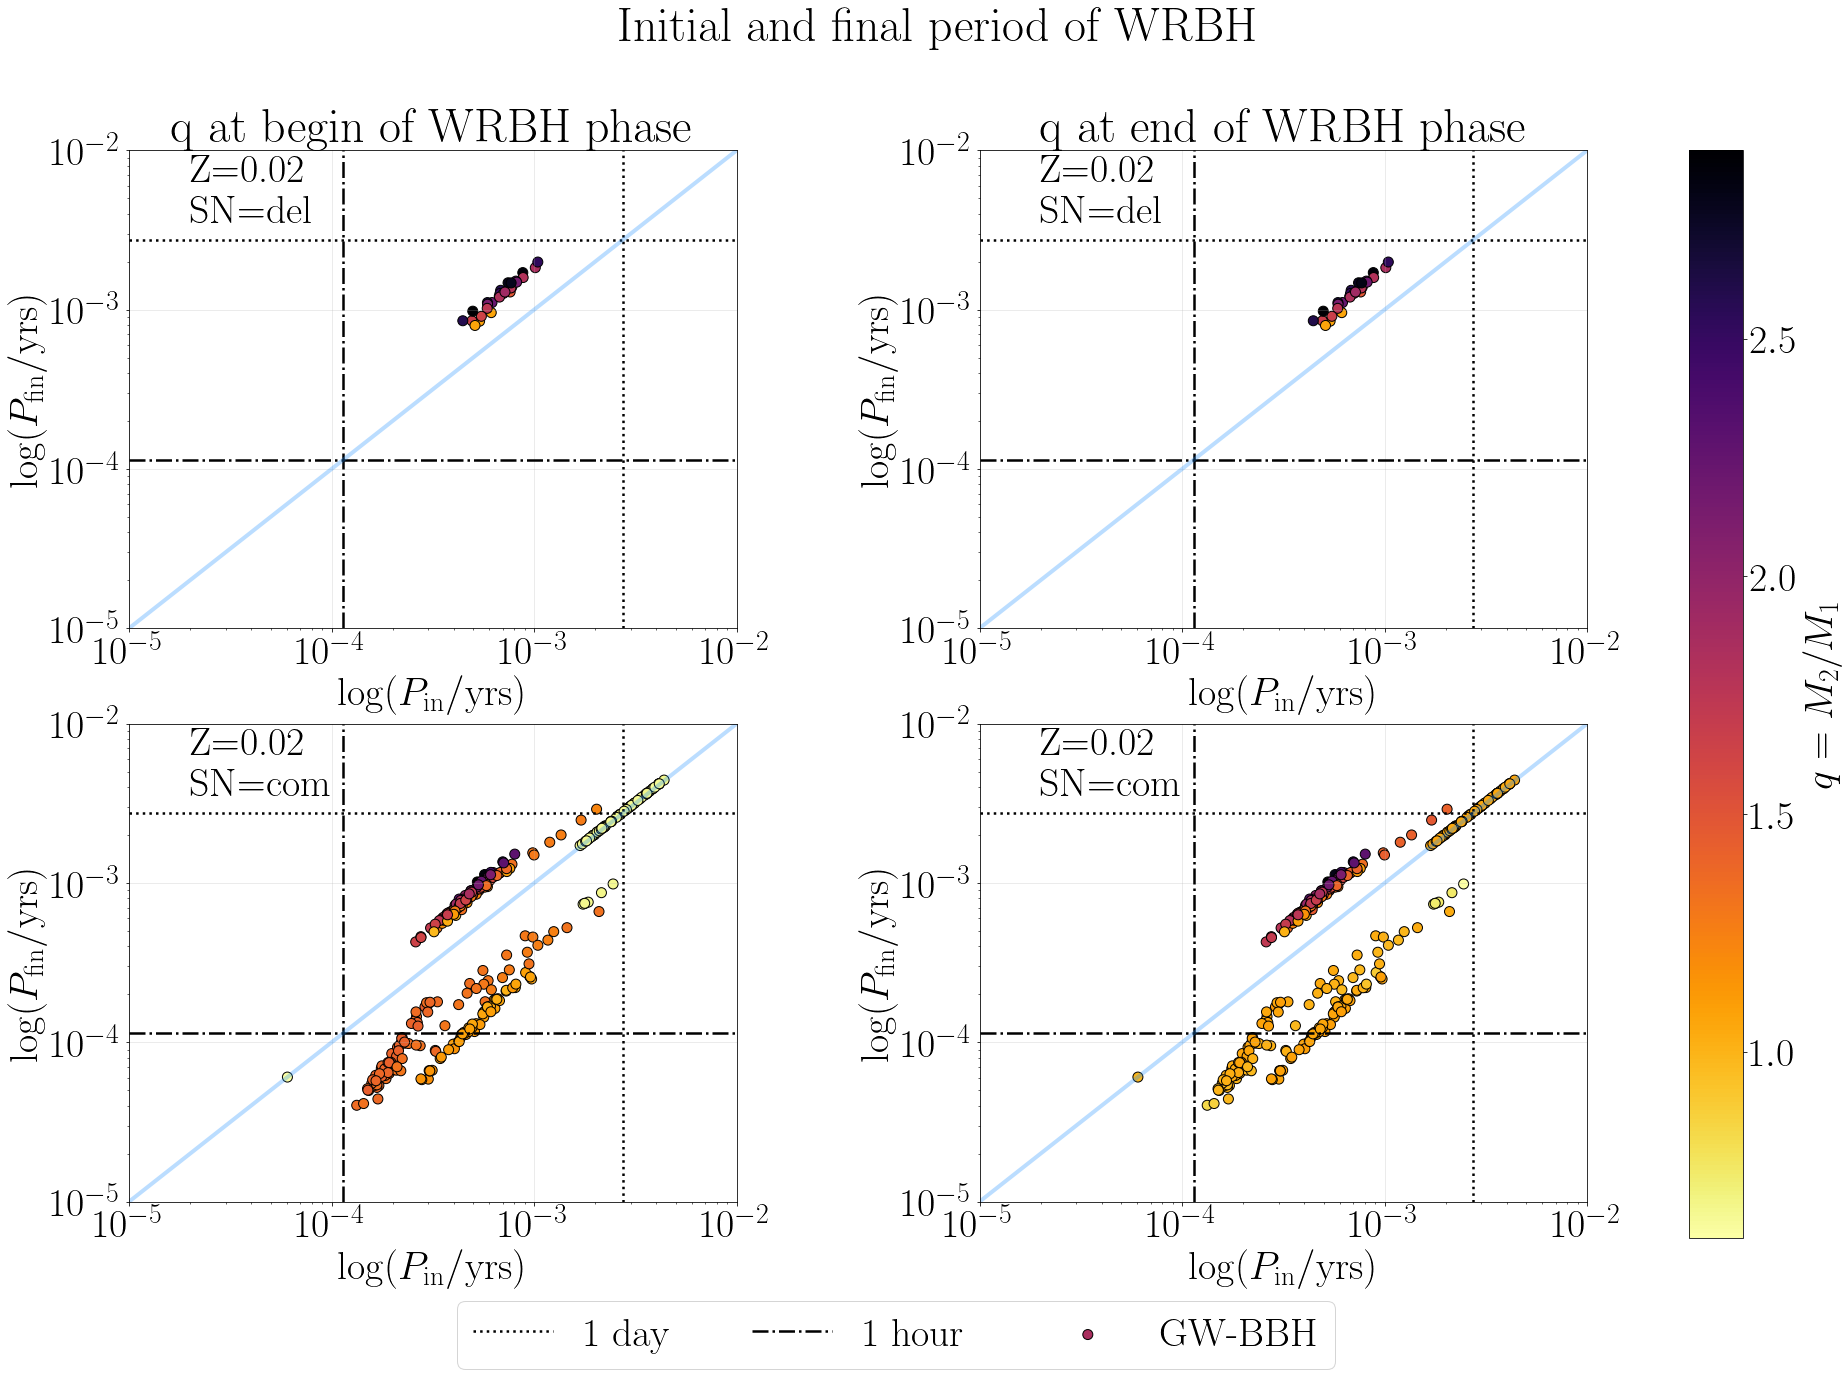

In [62]:
plottype = 'scatter2D_per_q_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Initial and final period of WRBH')
cmap= cm.get_cmap('inferno_r')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###       
    # initial and final state of WRBH

    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    df1,df2 = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

    ax.set_xlabel(r'$\displaystyle \log(P_{\rm in}/\rm yrs)$')
    ax.set_ylabel(r'$\displaystyle \log(P_{\rm fin}/\rm yrs)$')
    

    
    # make sure that both period-coordinates refer to the same binary
#     df1=df1.sort_values(by='ID')
#     df2=df2.sort_values(by='ID')
    
    # calculate mass ratio M2/M1 at beginning or at end of WRBH phase
    if (ax == axs[0][0]) | (ax == axs[1][0]):
        q = df1['Mass_1']/df1['Mass_0']
    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        q = df2['Mass_1']/df2['Mass_0']
    cs = ax.scatter(df1['Period'],df2['Period'] , marker='o', edgecolor = 'k', c=q,cmap=cmap,s=100, label='GW-BBH')

    
    ax.axhline(y=1./365, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day in yrs unit of measure
    ax.axhline(y=1./(365*24), linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour in yrs unit of measure
    
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
 
    ax.plot([1e-5,1e-2],[1e-5,1e-2], color='dodgerblue', alpha=0.3, linewidth=4)
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.1, 0.85),xycoords='axes fraction')
    ax.set_xlim(xmin=1e-5, xmax=1e-2) 
    ax.set_ylim(ymin=1e-5, ymax=1e-2)    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'$q=M_2/M_1$')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title('q at begin of WRBH phase')
axs[0][1].set_title('q at end of WRBH phase')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15, right=0.8,wspace = 0.4 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

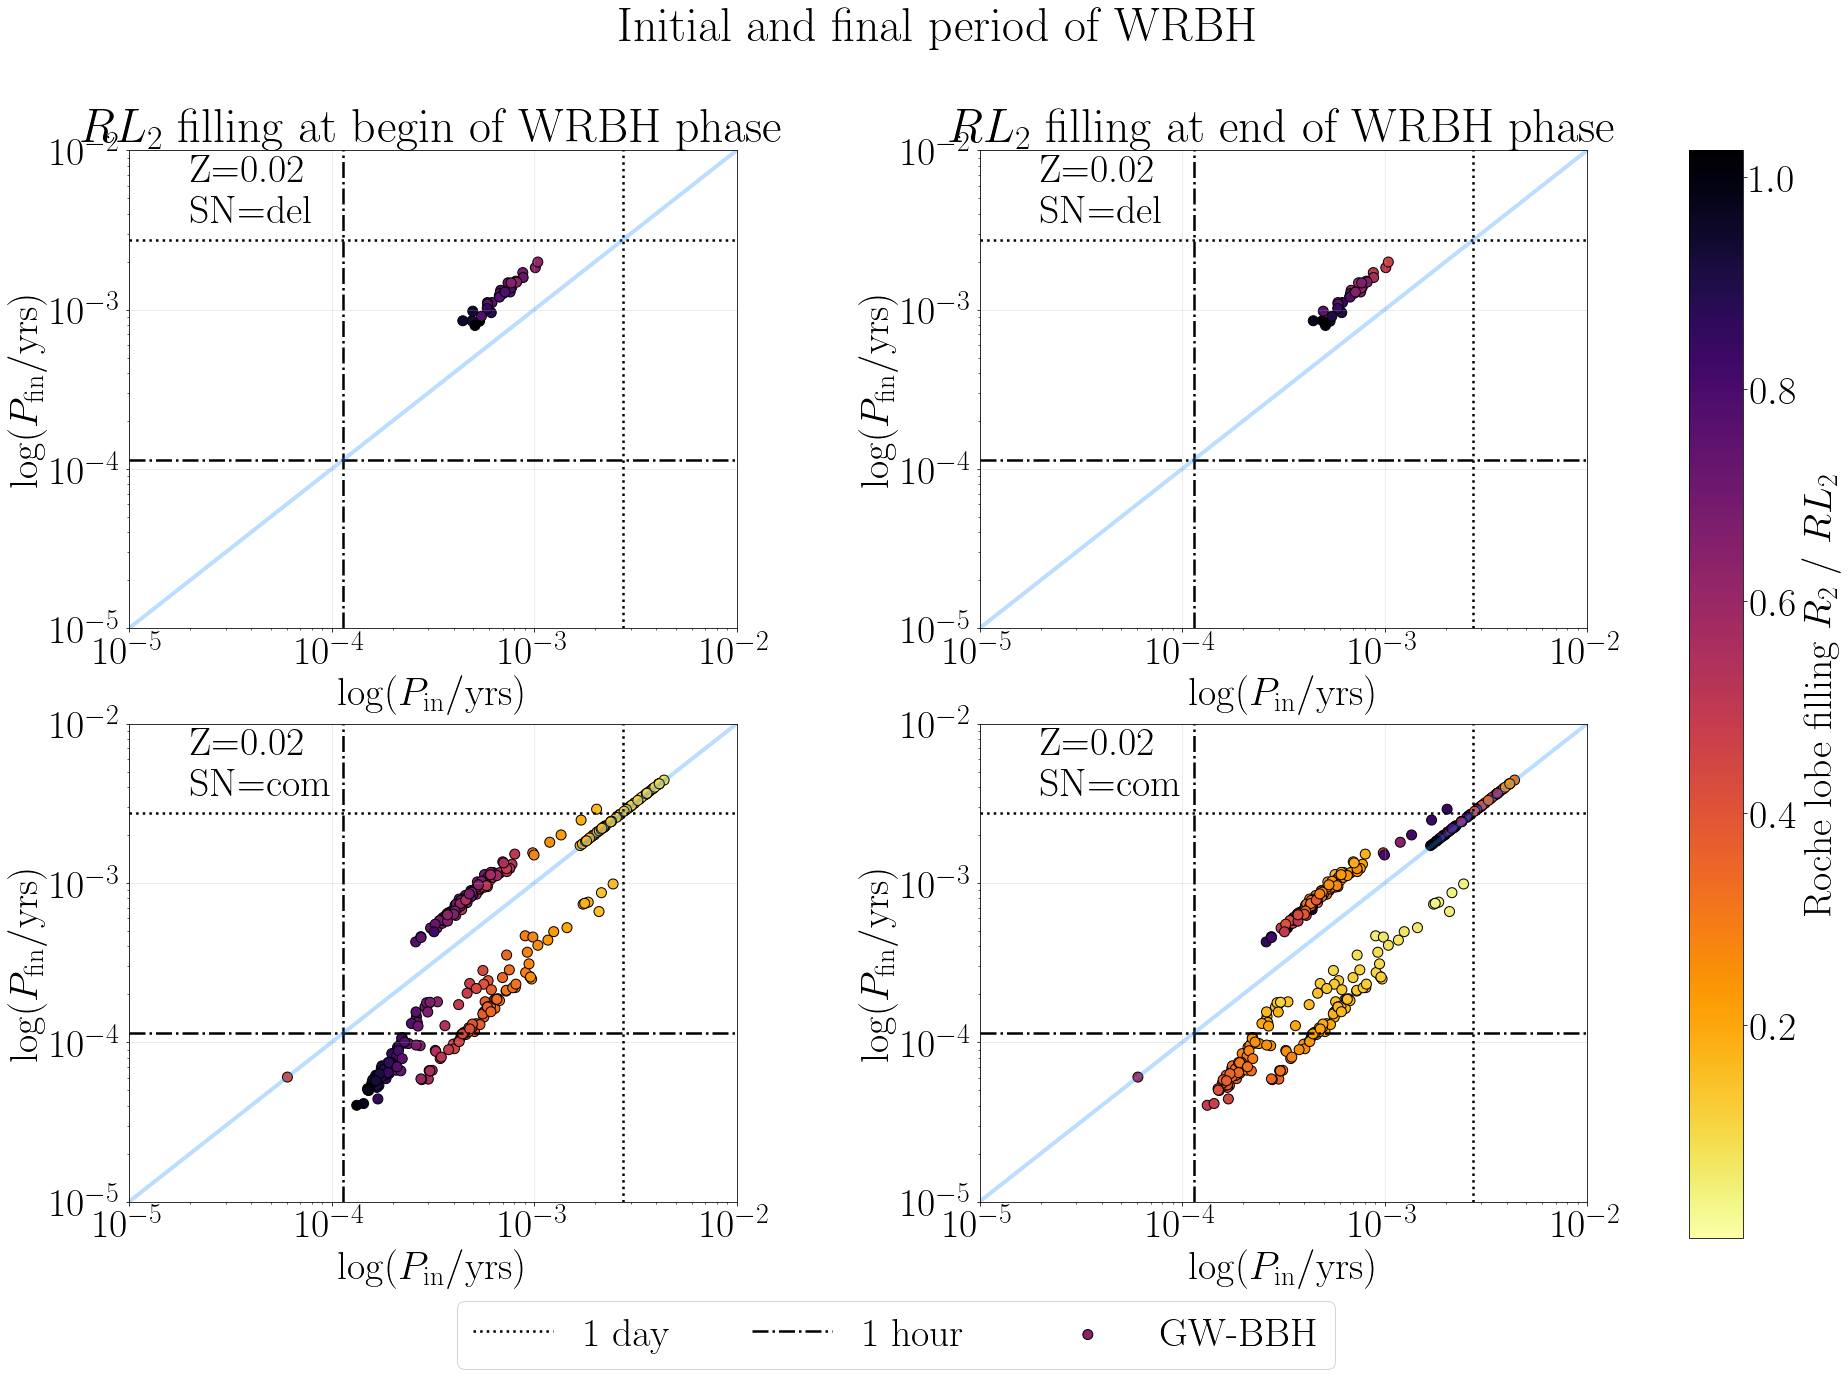

In [63]:
plottype = 'scatter2D_per_RLfill_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Initial and final period of WRBH')
cmap= cm.get_cmap('inferno_r')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###       
    # initial and final state of WRBH

    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    df1,df2 = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

    ax.set_xlabel(r'$\displaystyle \log(P_{\rm in}/\rm yrs)$')
    ax.set_ylabel(r'$\displaystyle \log(P_{\rm fin}/\rm yrs)$')
    

    
    # make sure that both period-coordinates refer to the same binary
    df1=df1.sort_values(by='ID')
    df2=df2.sort_values(by='ID')
    
    # calculate mass ratio M2/M1 at beginning or at end of WRBH phase
    if (ax == axs[0][0]) | (ax == axs[1][0]):
        RLfill = df1['RL1_fill']
    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        RLfill = df2['RL1_fill']
    cs = ax.scatter(df1['Period'],df2['Period'] , marker='o', edgecolor = 'k', c=RLfill,cmap=cmap,s=100, label='GW-BBH')

    
    ax.axhline(y=1./365, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day in yrs unit of measure
    ax.axhline(y=1./(365*24), linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour in yrs unit of measure
    
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
 
    ax.plot([1e-5,1e-2],[1e-5,1e-2], color='dodgerblue', alpha=0.3, linewidth=4)
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.1, 0.85),xycoords='axes fraction')
    ax.set_xlim(xmin=1e-5, xmax=1e-2) 
    ax.set_ylim(ymin=1e-5, ymax=1e-2)   
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'Roche lobe filling $R_2$ / $RL_2$')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title('$RL_2$ filling at begin of WRBH phase')
axs[0][1].set_title('$RL_2$ filling at end of WRBH phase')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15, right=0.8,wspace = 0.4 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

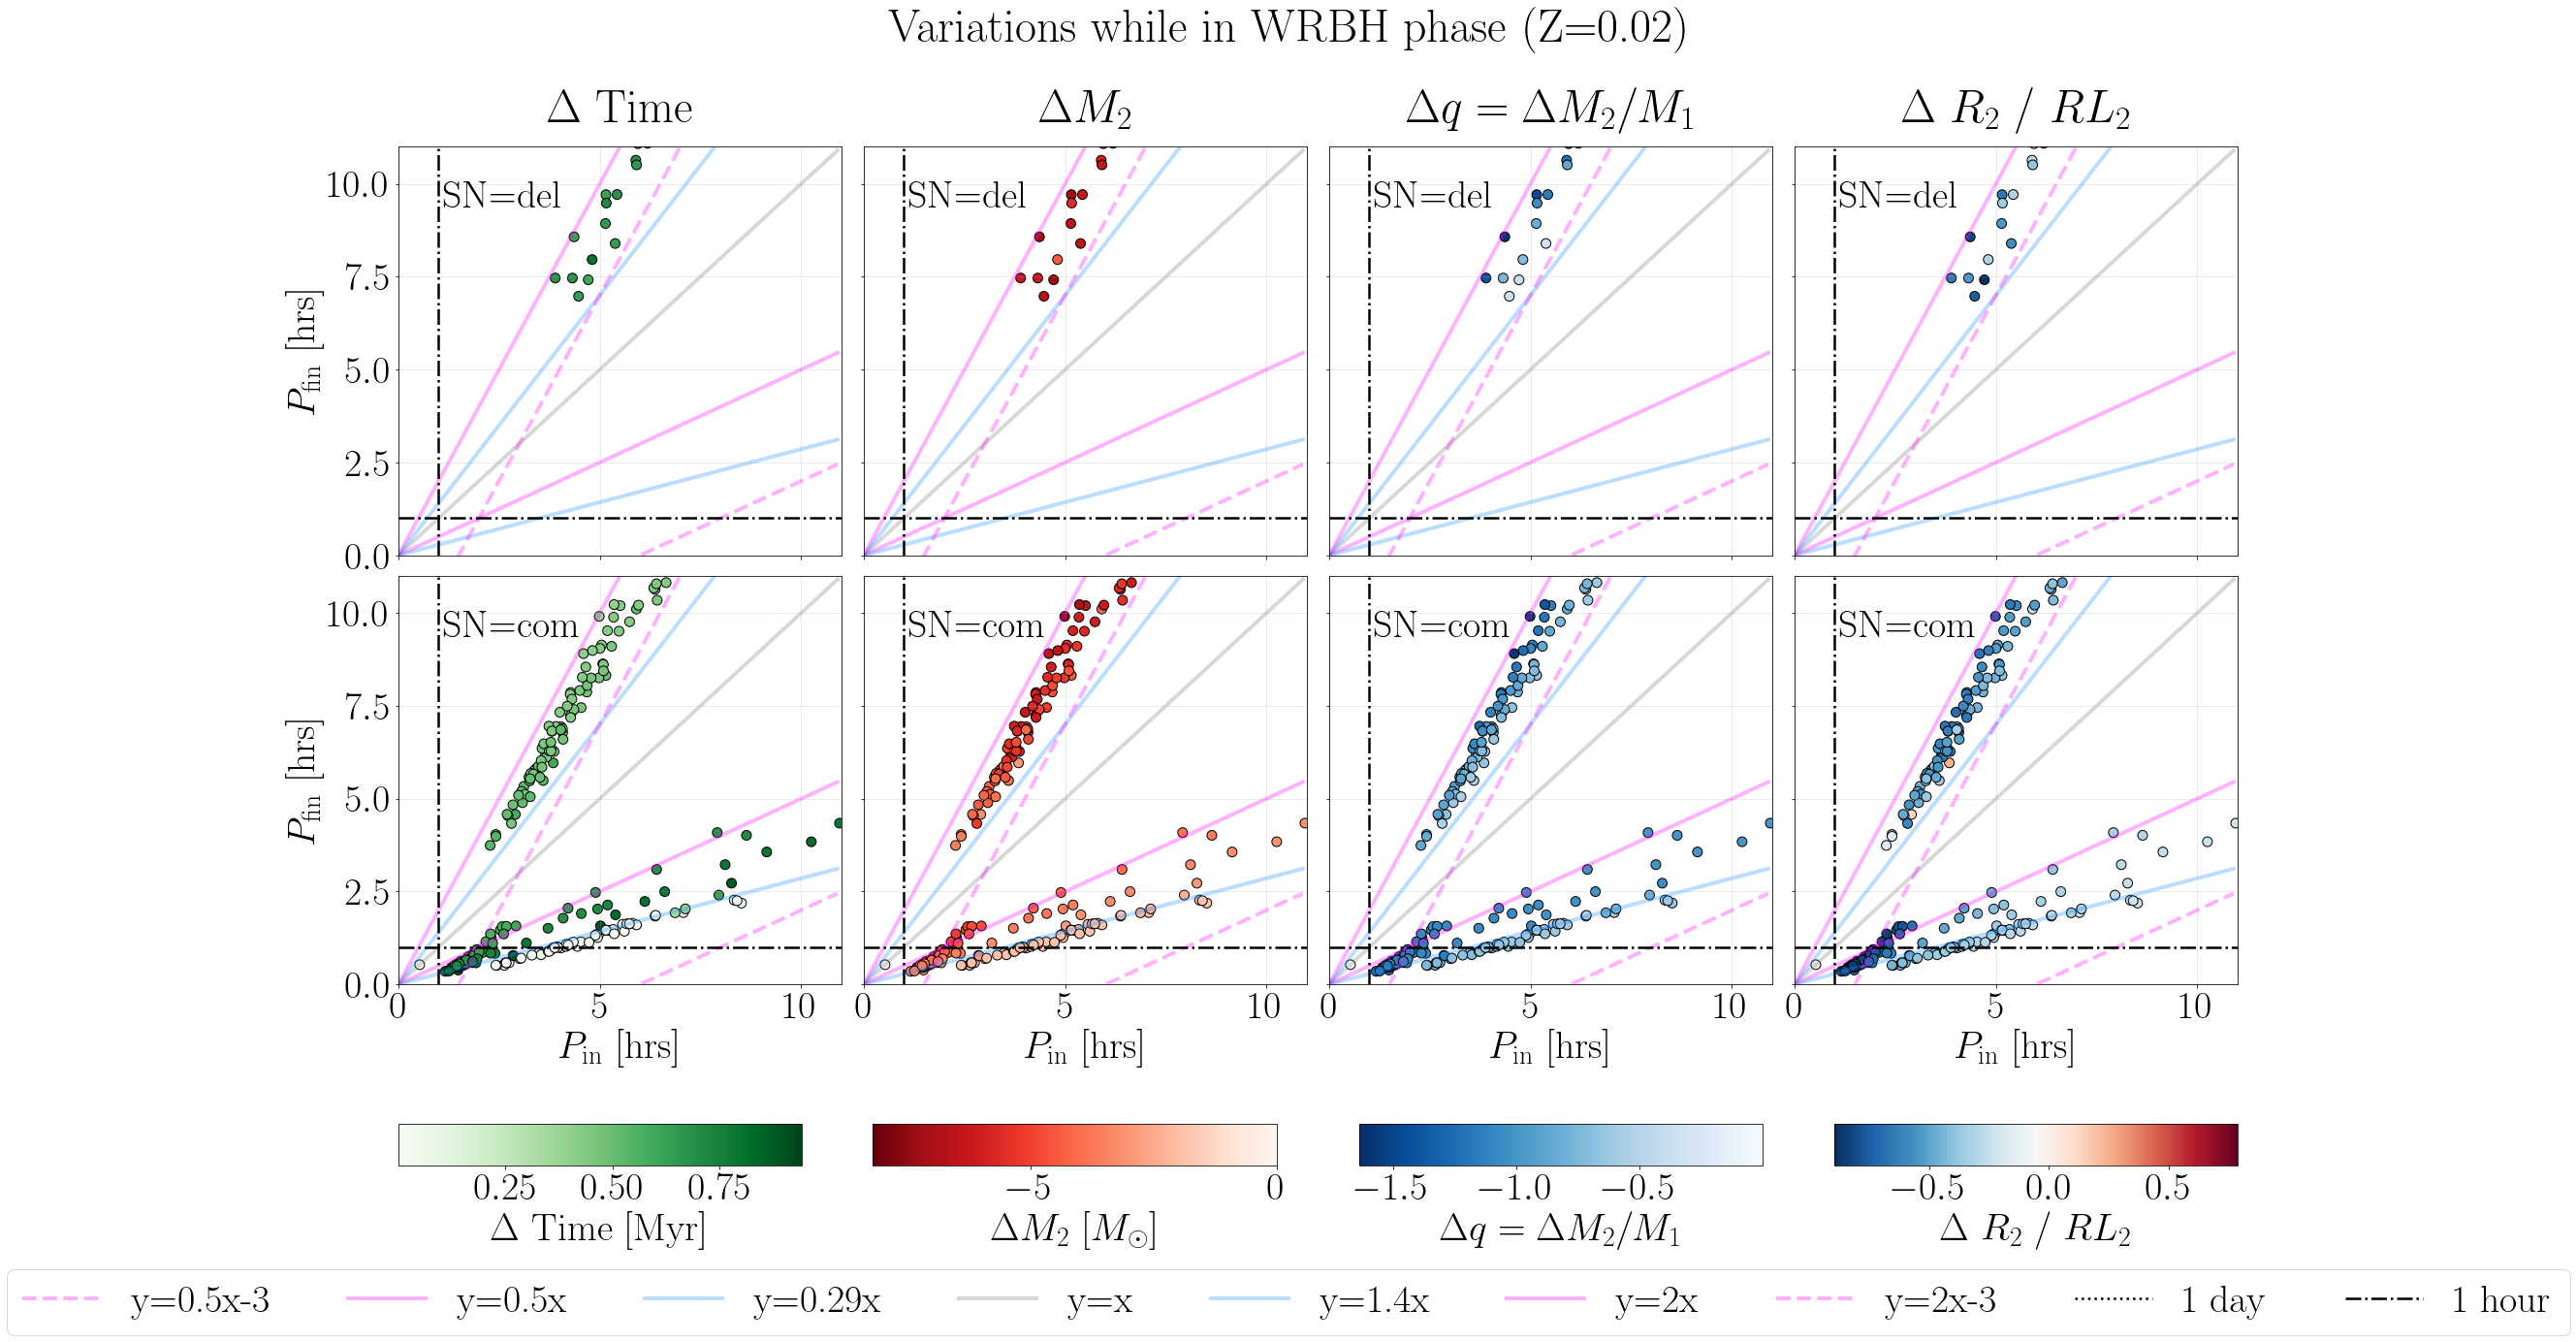

In [64]:
plottype = 'scatter2D_deltaTOT_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(34,20), sharex = True, sharey=True)
fig.suptitle('Variations while in WRBH phase (Z=0.02)')

Zs = ['02','02']
SNs = ['del','com']

for row,Z,SN in zip(range(0,len(Zs)),Zs,SNs):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###      
    # initial and final state of WRBH
    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored
    
    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')
    i, f =i.sort_values(by='ID'), f.sort_values(by='ID')  # make sure that both period-coordinates refer to the same binary
    
    ### calculate deltas f-i ###
    delta_time = f['BWorldtime'] - i['BWorldtime']
    delta_M2 = f['Mass_1'] - i['Mass_1']
    delta_q = f['Mass_1']/f['Mass_0'] - i['Mass_1']/i['Mass_0'] 
    delta_RLfill = f['RL1_fill'] - i['RL1_fill']
    
    
    ### prepare lists ###
    values_list = [delta_time,delta_M2,delta_q,delta_RLfill]
    delta_list = [r'$\Delta$ Time',r'$\Delta M_2$',r'$\Delta q=\Delta M_2/M_1$',r'$\Delta$  $R_2$ / $RL_2$']
    units_list = ['[Myr]','$[M_\odot]$','','']
    cmap_list = ['Greens','Reds_r','Blues_r','RdBu_r']
    xmin_list = [0.125, 0.325,0.530,0.730]  
    
    for col,value,delta,unit,cmap,xminc in zip(range(0,4),values_list,delta_list,units_list,cmap_list,xmin_list):
        axs[0][col].set_title(delta, pad=25)
        axs[row][col].annotate(f'SN={SN}', xy=(0.1, 0.85),xycoords='axes fraction')
         
        xmin, xmax = 0, 11    # xmax = 41 or 11
        x = np.arange(xmin,xmax,0.1)
        axs[row][col].plot(x,0.5*x-3, color='fuchsia', linestyle='dashed',alpha=0.3, linewidth=4, label='y=0.5x-3')
        axs[row][col].plot(x,0.5*x, color='fuchsia', alpha=0.3, linewidth=4, label='y=0.5x')
        axs[row][col].plot(x,(1-1/1.4)*x, color='dodgerblue', alpha=0.3, linewidth=4, label='y=0.29x')
        axs[row][col].plot(x,x, color='grey', alpha=0.3, linewidth=4, label='y=x')
        axs[row][col].plot(x,1.4*x, color='dodgerblue', alpha=0.3, linewidth=4, label='y=1.4x')
        axs[row][col].plot(x,2*x, color='fuchsia', alpha=0.3, linewidth=4, label='y=2x')
        axs[row][col].plot(x,2*x-3, color='fuchsia', alpha=0.3, linewidth=4, linestyle='dashed', label='y=2x-3')
        axs[row][col].set_xlim(xmin=xmin, xmax=xmax) 
        axs[row][col].set_ylim(ymin=xmin, ymax=xmax)   
        
        cmap= cm.get_cmap(cmap)
        cs = axs[row][col].scatter(i['Period']*24*365,f['Period']*24*365 , marker='o', edgecolor = 'k', c=value,cmap=cmap,s=100)
        
        if row==1:
            cbar_ax = fig.add_axes([xminc, 0.15, 0.17, 0.03])     # xmin,ymin,xwidth,ywidth
            cbar=plt.colorbar(cs, ax=axs[1][col],orientation='horizontal',cax=cbar_ax)
            cbar.set_label(delta +' ' + unit)
        
        axs[row][col].axhline(y=24, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day 
        axs[row][col].axhline(y=1, linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour
        axs[row][col].axvline(x=24, linestyle='dotted', linewidth =lw, color='k') # 1 day 
        axs[row][col].axvline(x=1, linestyle='dashdot', linewidth =lw, color='k') # 1 hour 
        
        if col==0:
            axs[row][col].set_ylabel(r'$\displaystyle P_{\rm fin}$ [hrs]')
        if row ==1:
            axs[row][col].set_xlabel(r'$\displaystyle P_{\rm in}$ [hrs]')
#         axs[row][col].set_xscale('log')
#         axs[row][col].set_yscale('log')
        axs[row][col].grid(alpha=0.3)


handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=9, bbox_to_anchor=(0.5,0.015))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.28, wspace=0.05,hspace=0.05)

plt.show()
fig.savefig(f'{path_plots}{plottype}_Mmax{xmax}.jpg')

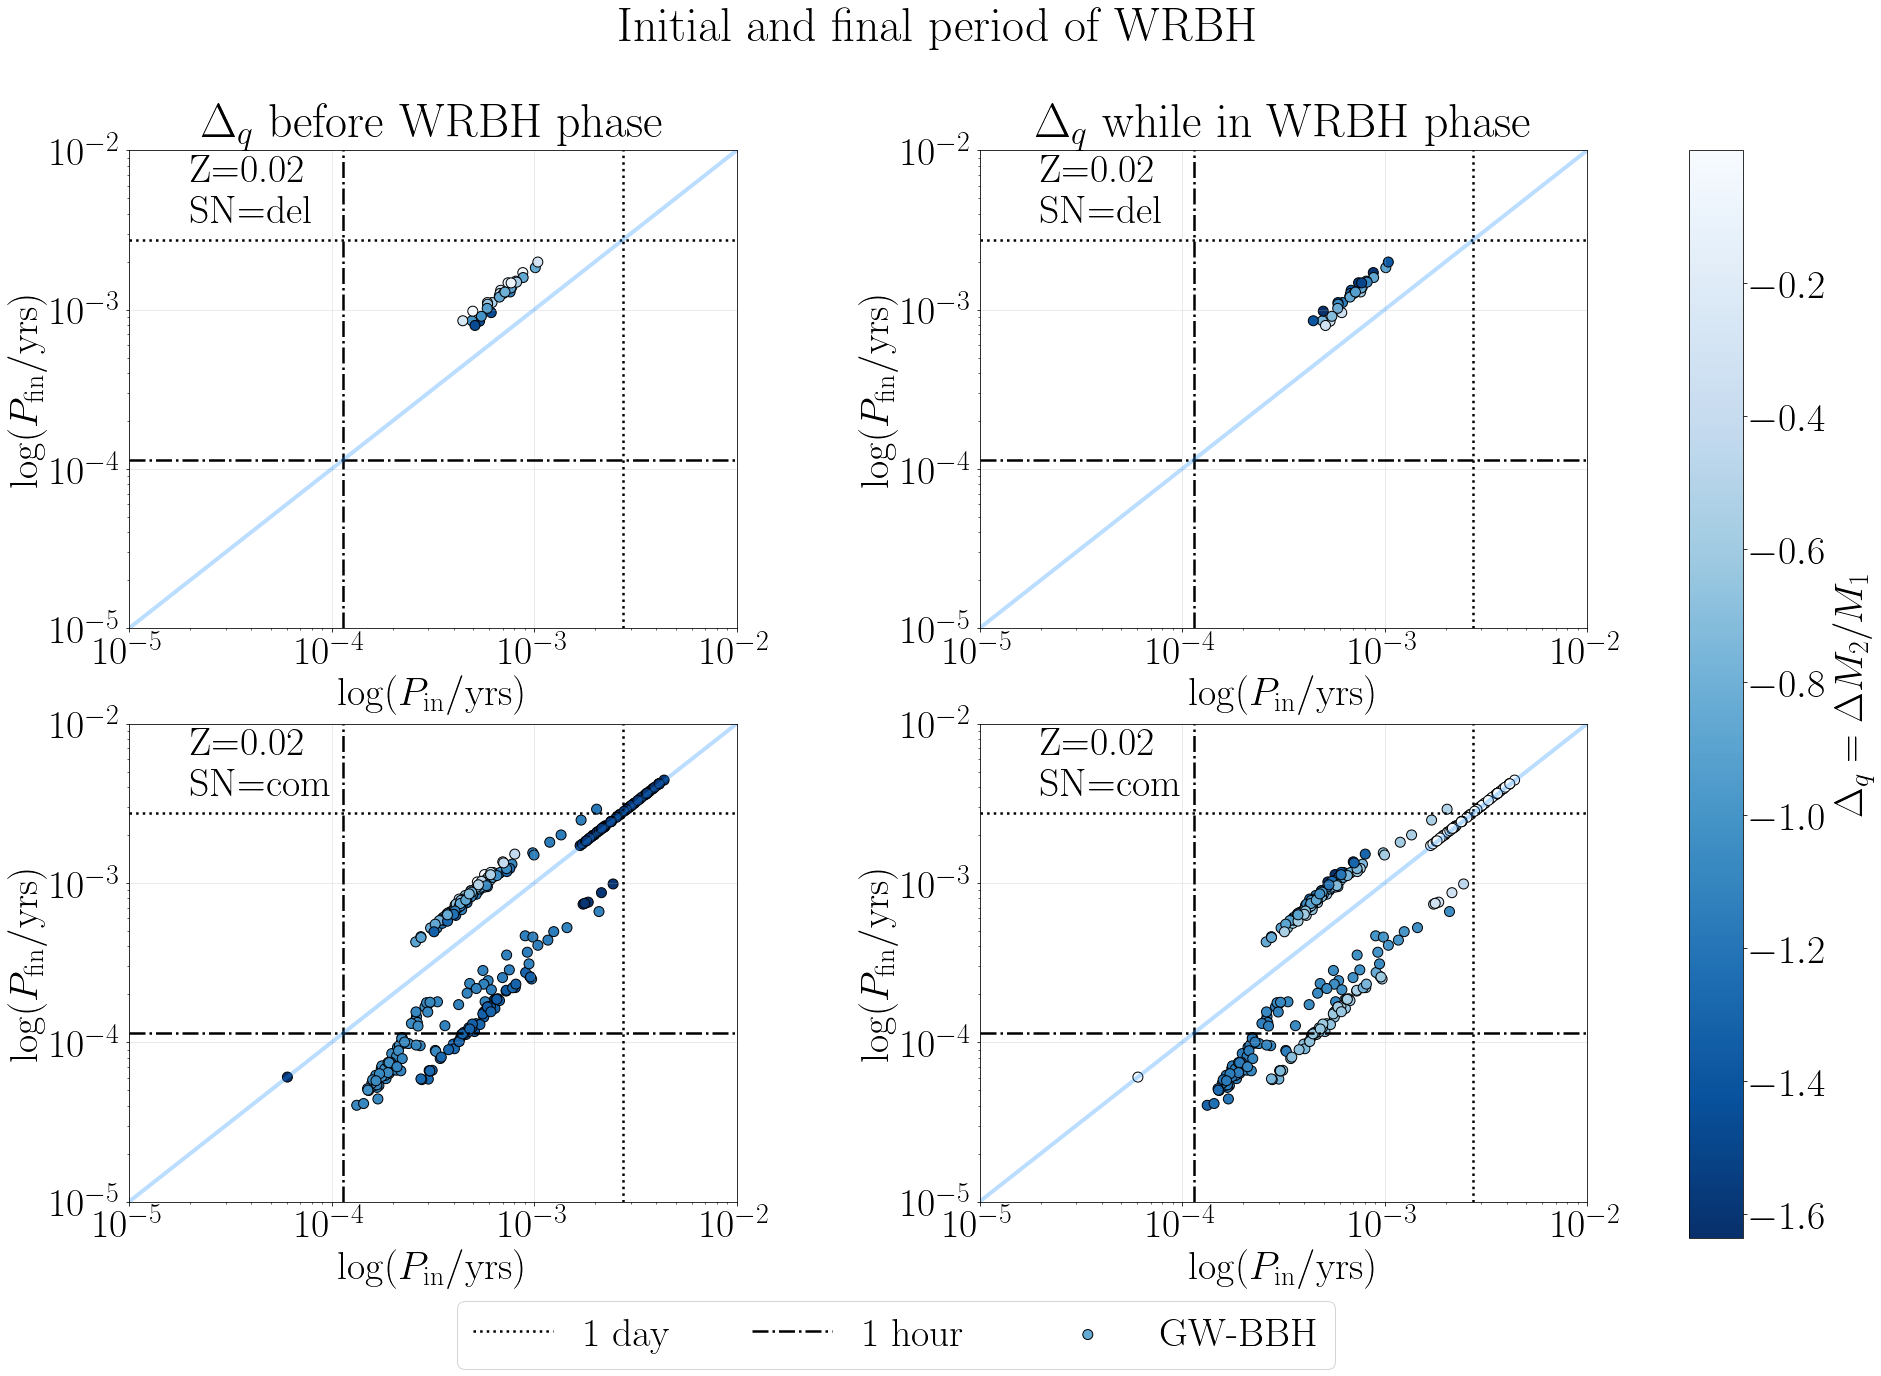

In [65]:
plottype = 'scatter2D_deltaq_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Initial and final period of WRBH')
cmap= cm.get_cmap('Blues_r')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###  
    # progenitors and remnants of WRBH
    path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
    path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored

    p,r = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

    
    # initial and final state of WRBH

    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

    ax.set_xlabel(r'$\displaystyle \log(P_{\rm in}/\rm yrs)$')
    ax.set_ylabel(r'$\displaystyle \log(P_{\rm fin}/\rm yrs)$')
    

    
    # make sure that both period-coordinates refer to the same binary
    p, r =p.sort_values(by='ID'), r.sort_values(by='ID')
    i, f =i.sort_values(by='ID'), f.sort_values(by='ID')
    
    # calculate mass ratio M2/M1 at beginning or at end 
    qp = p['Mass_1']/p['Mass_0']
    qr = r['Mass_1']/r['Mass_0']
    qi = i['Mass_1']/i['Mass_0']
    qf = f['Mass_1']/f['Mass_0']
    
    deltaq_i_p = qi - qp
    deltaq_f_i = qf - qi    
    
    # plot
    if (ax == axs[0][0]) | (ax == axs[1][0]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_i_p,cmap=cmap,s=100, label='GW-BBH')

    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_f_i,cmap=cmap,s=100, label='GW-BBH')

    
    ax.axhline(y=1./365, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day in yrs unit of measure
    ax.axhline(y=1./(365*24), linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour in yrs unit of measure
    
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
 
    ax.plot([1e-5,1e-2],[1e-5,1e-2], color='dodgerblue', alpha=0.3, linewidth=4)
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.1, 0.85),xycoords='axes fraction')
    ax.set_xlim(xmin=1e-5, xmax=1e-2) 
    ax.set_ylim(ymin=1e-5, ymax=1e-2)      
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'$\Delta_q=\Delta M_2/M_1$')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title(r'$\Delta_q$ before WRBH phase')
axs[0][1].set_title(r'$\Delta_q$ while in WRBH phase')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15,  right=0.8,wspace = 0.4 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

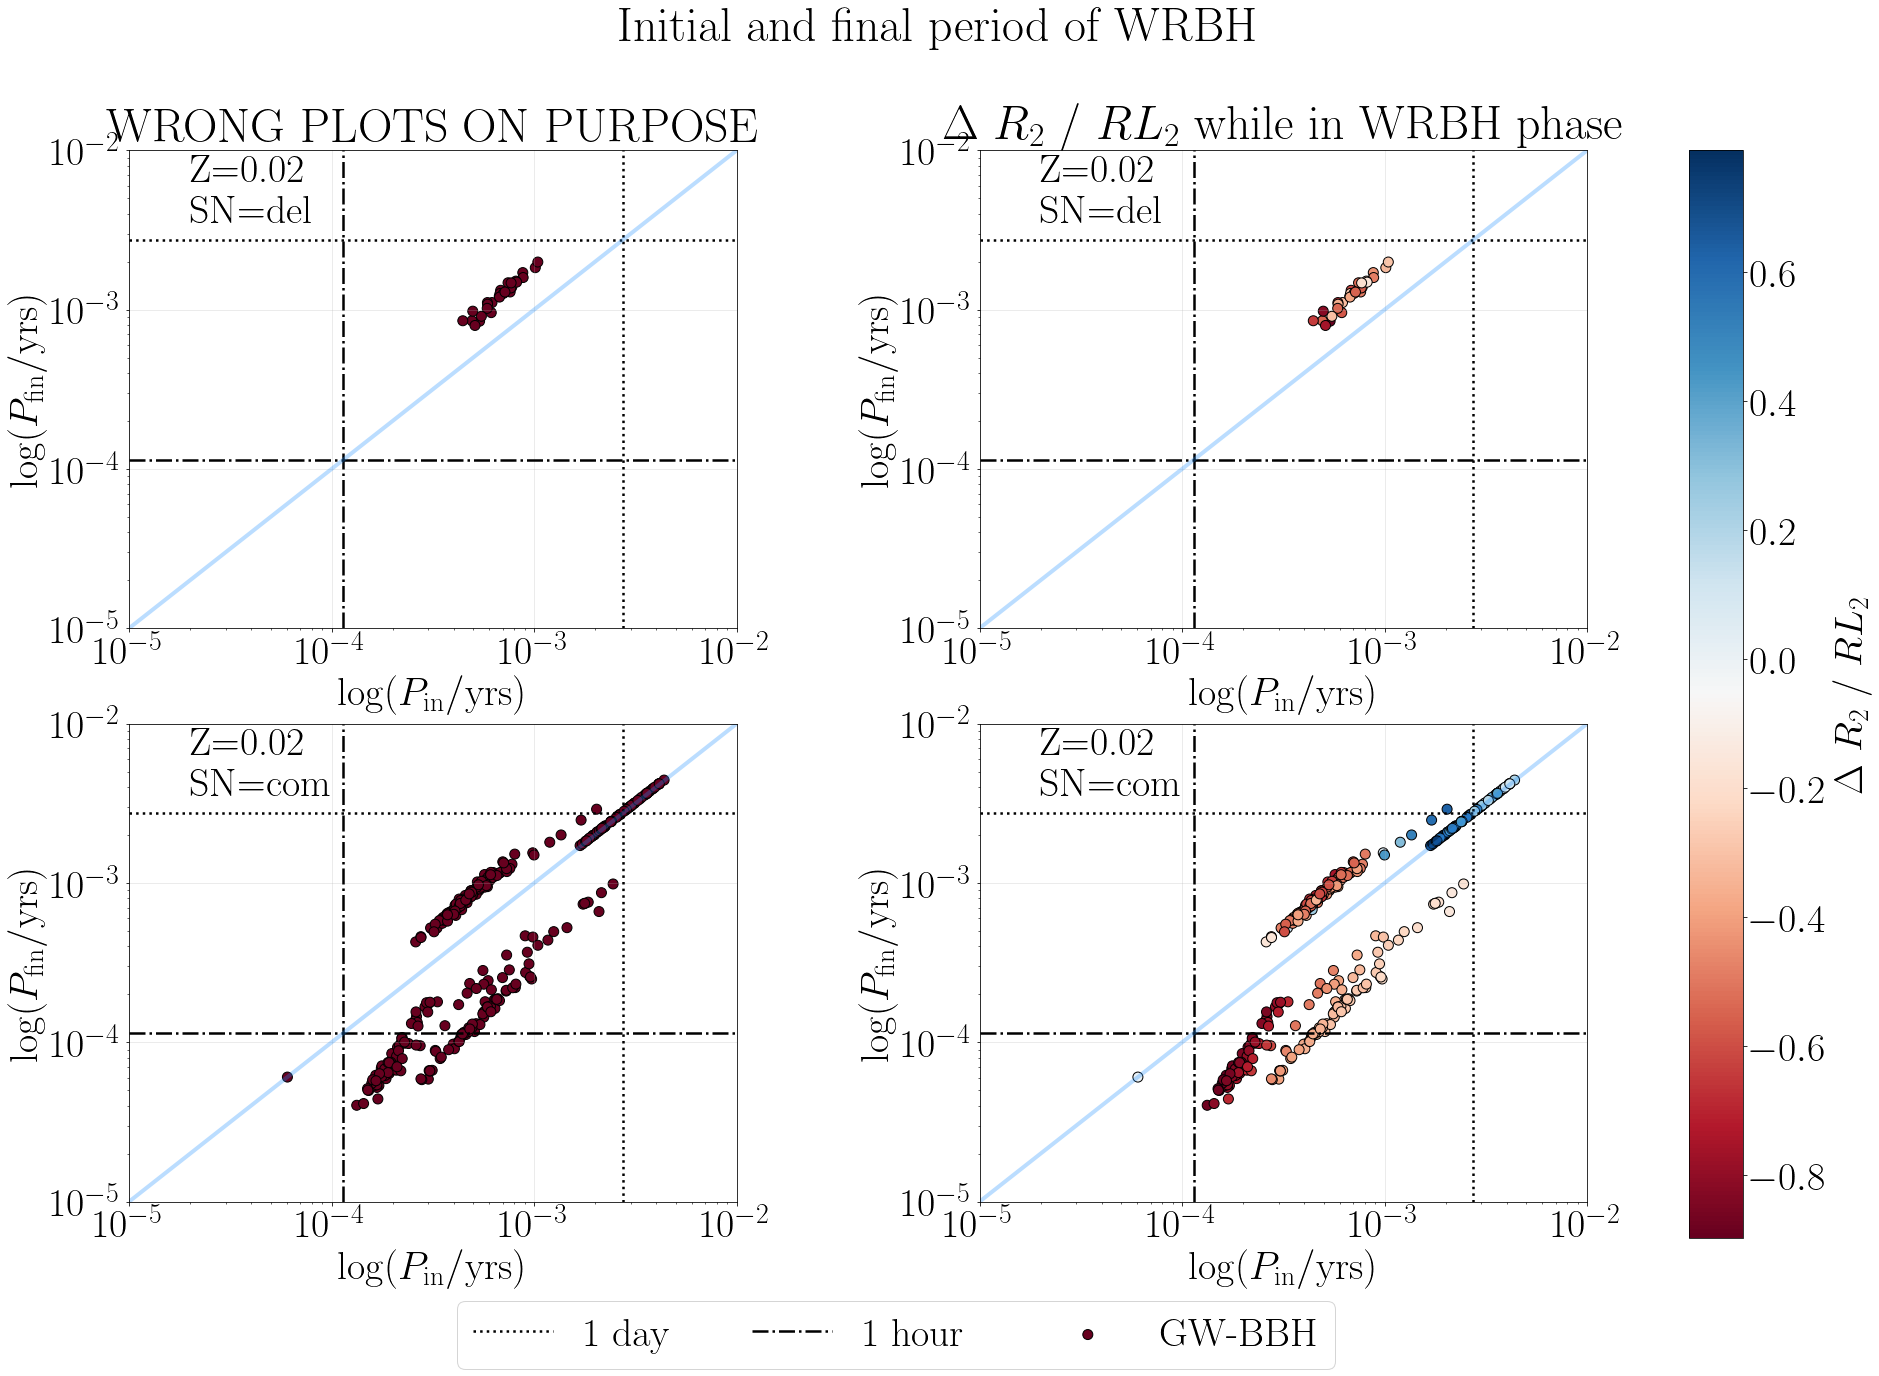

In [66]:
plottype = 'scatter2D_deltaRLfill_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Initial and final period of WRBH')
cmap= cm.get_cmap('RdBu')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###  
    # progenitors and remnants of WRBH
    path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
    path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored

    p,r = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

    
    # initial and final state of WRBH

    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

    ax.set_xlabel(r'$\displaystyle \log(P_{\rm in}/\rm yrs)$')
    ax.set_ylabel(r'$\displaystyle \log(P_{\rm fin}/\rm yrs)$')
    

    
    # make sure that both period-coordinates refer to the same binary
    p, r =p.sort_values(by='ID'), r.sort_values(by='ID')
    i, f =i.sort_values(by='ID'), f.sort_values(by='ID')
    
    deltaq_i_p = i['RL1_fill'] - i['RL1_fill']   ##### wrong on purpose!!!
    deltaq_f_i = f['RL1_fill']-i['RL1_fill']   
    
    # plot
    if (ax == axs[0][0]) | (ax == axs[1][0]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_i_p,cmap=cmap,s=100, label='GW-BBH')

    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_f_i,cmap=cmap,s=100, label='GW-BBH')

    
    ax.axhline(y=1./365, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day in yrs unit of measure
    ax.axhline(y=1./(365*24), linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour in yrs unit of measure
    
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
 
    ax.plot([1e-5,1e-2],[1e-5,1e-2], color='dodgerblue', alpha=0.3, linewidth=4)
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.1, 0.85),xycoords='axes fraction')
    ax.set_xlim(xmin=1e-5, xmax=1e-2) 
    ax.set_ylim(ymin=1e-5, ymax=1e-2)    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'$\Delta$  $R_2$ / $RL_2$')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title(r'WRONG PLOTS ON PURPOSE')
axs[0][1].set_title(r'$\Delta$  $R_2$ / $RL_2$ while in WRBH phase')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15,  right=0.8,wspace = 0.4 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

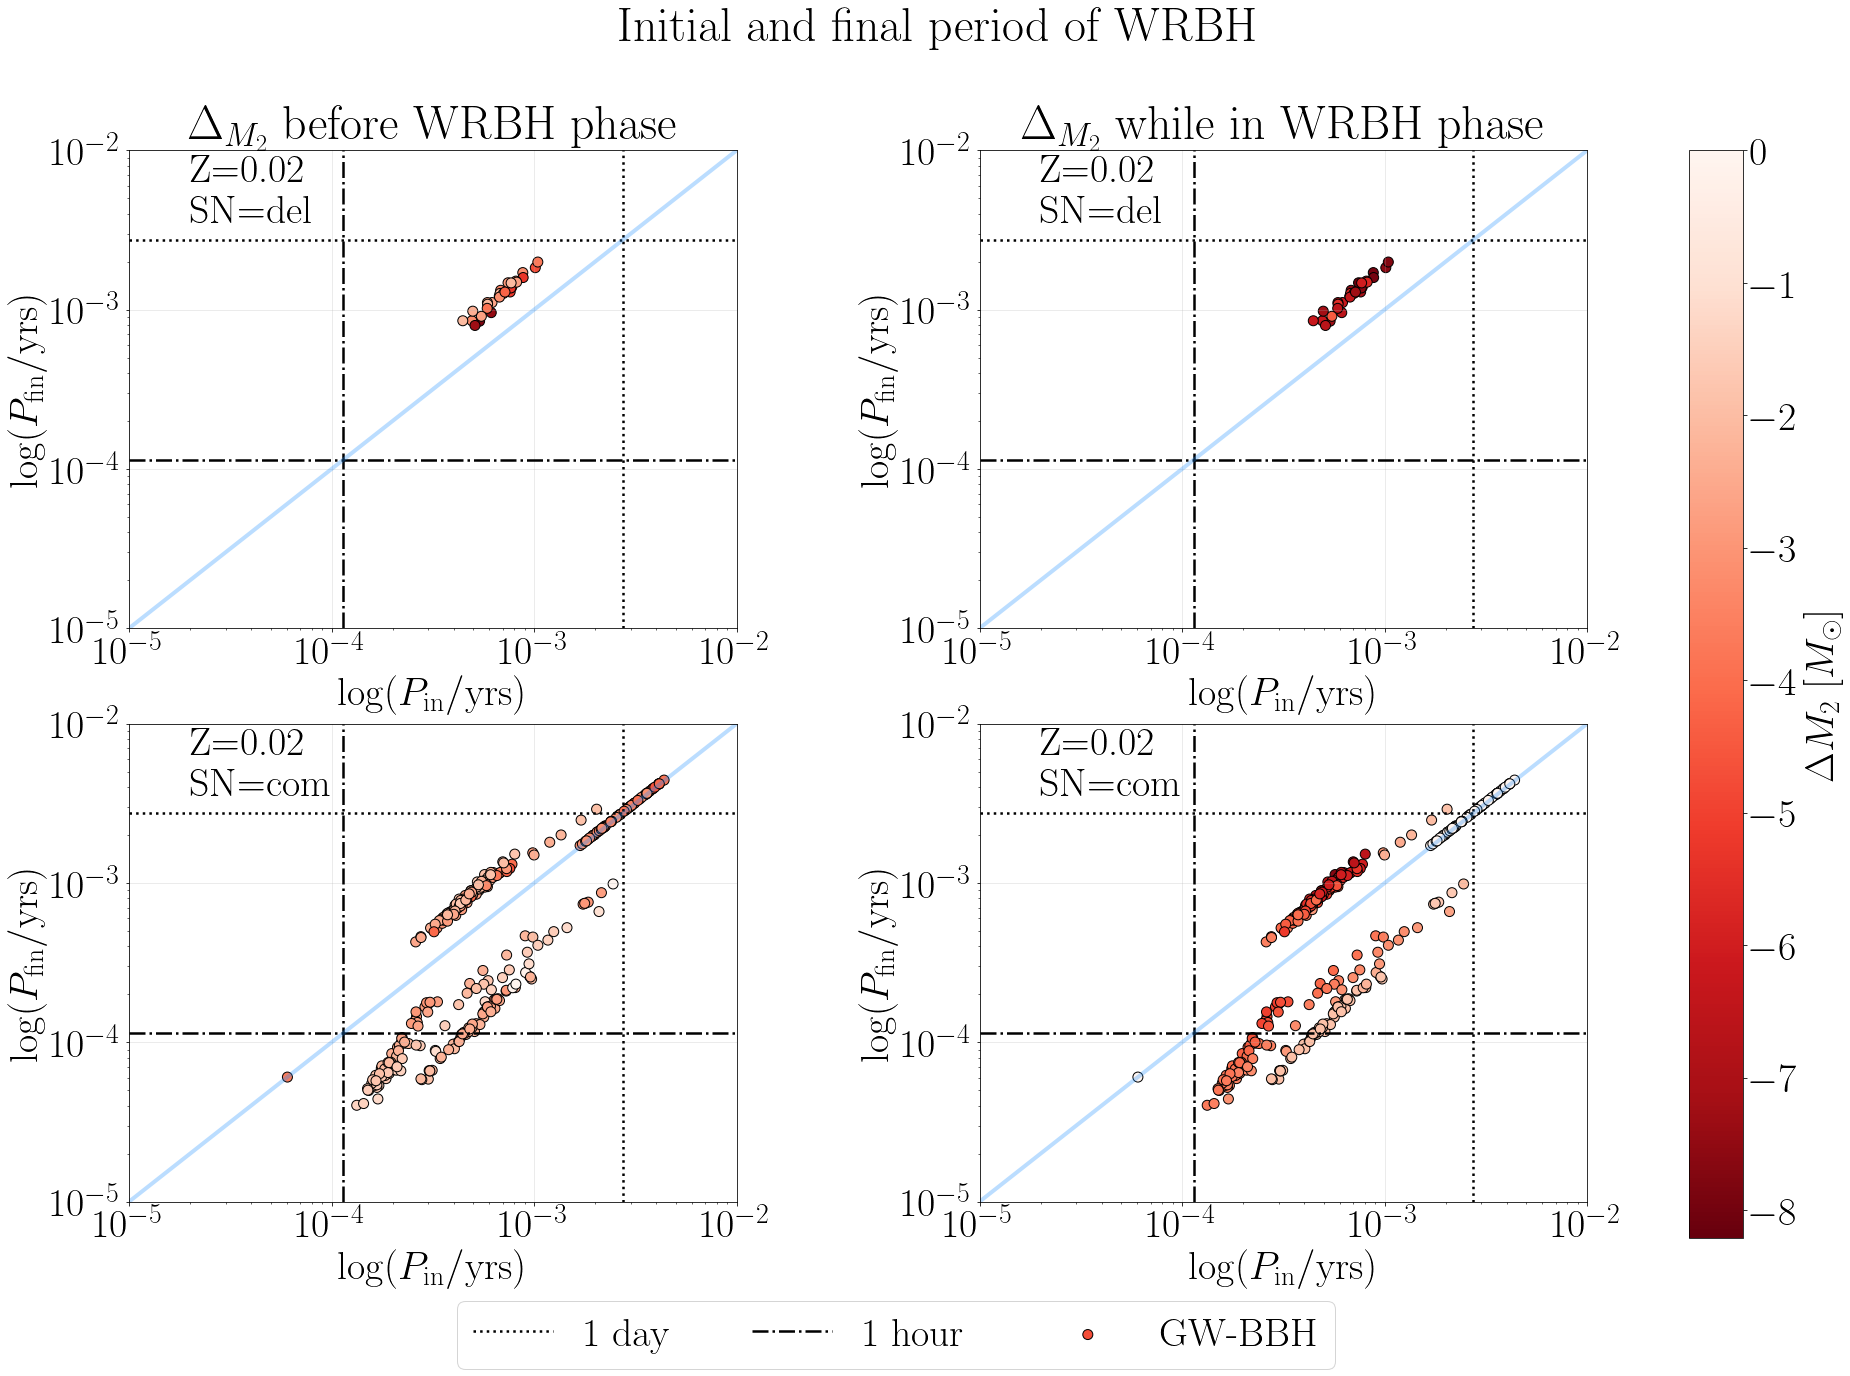

In [67]:
plottype = 'scatter2D_deltaM2_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Initial and final period of WRBH')
cmap= cm.get_cmap('Reds_r')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###  
    # progenitors and remnants of WRBH
    path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
    path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored

    p,r = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

    
    # initial and final state of WRBH

    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

    ax.set_xlabel(r'$\displaystyle \log(P_{\rm in}/\rm yrs)$')
    ax.set_ylabel(r'$\displaystyle \log(P_{\rm fin}/\rm yrs)$')
    

    
    # make sure that both period-coordinates refer to the same binary
    p, r =p.sort_values(by='ID'), r.sort_values(by='ID')
    i, f =i.sort_values(by='ID'), f.sort_values(by='ID')
    
    
    deltaq_i_p = i['Mass_1']-p['Mass_1']
    deltaq_f_i = f['Mass_1']-i['Mass_1']
    
    # plot
    if (ax == axs[0][0]) | (ax == axs[1][0]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_i_p,cmap=cmap,s=100, label='GW-BBH')

    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_f_i,cmap=cmap,s=100, label='GW-BBH')

    
    ax.axhline(y=1./365, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day in yrs unit of measure
    ax.axhline(y=1./(365*24), linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour in yrs unit of measure
    
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
 
    ax.plot([1e-5,1e-2],[1e-5,1e-2], color='dodgerblue', alpha=0.3, linewidth=4)
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.1, 0.85),xycoords='axes fraction')
    ax.set_xlim(xmin=1e-5, xmax=1e-2) 
    ax.set_ylim(ymin=1e-5, ymax=1e-2)       
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'$\Delta M_2 ~ [M_\odot]$')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title(r'$\Delta_{M_2}$ before WRBH phase')
axs[0][1].set_title(r'$\Delta_{M_2}$ while in WRBH phase')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15, right=0.8,wspace = 0.4 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')

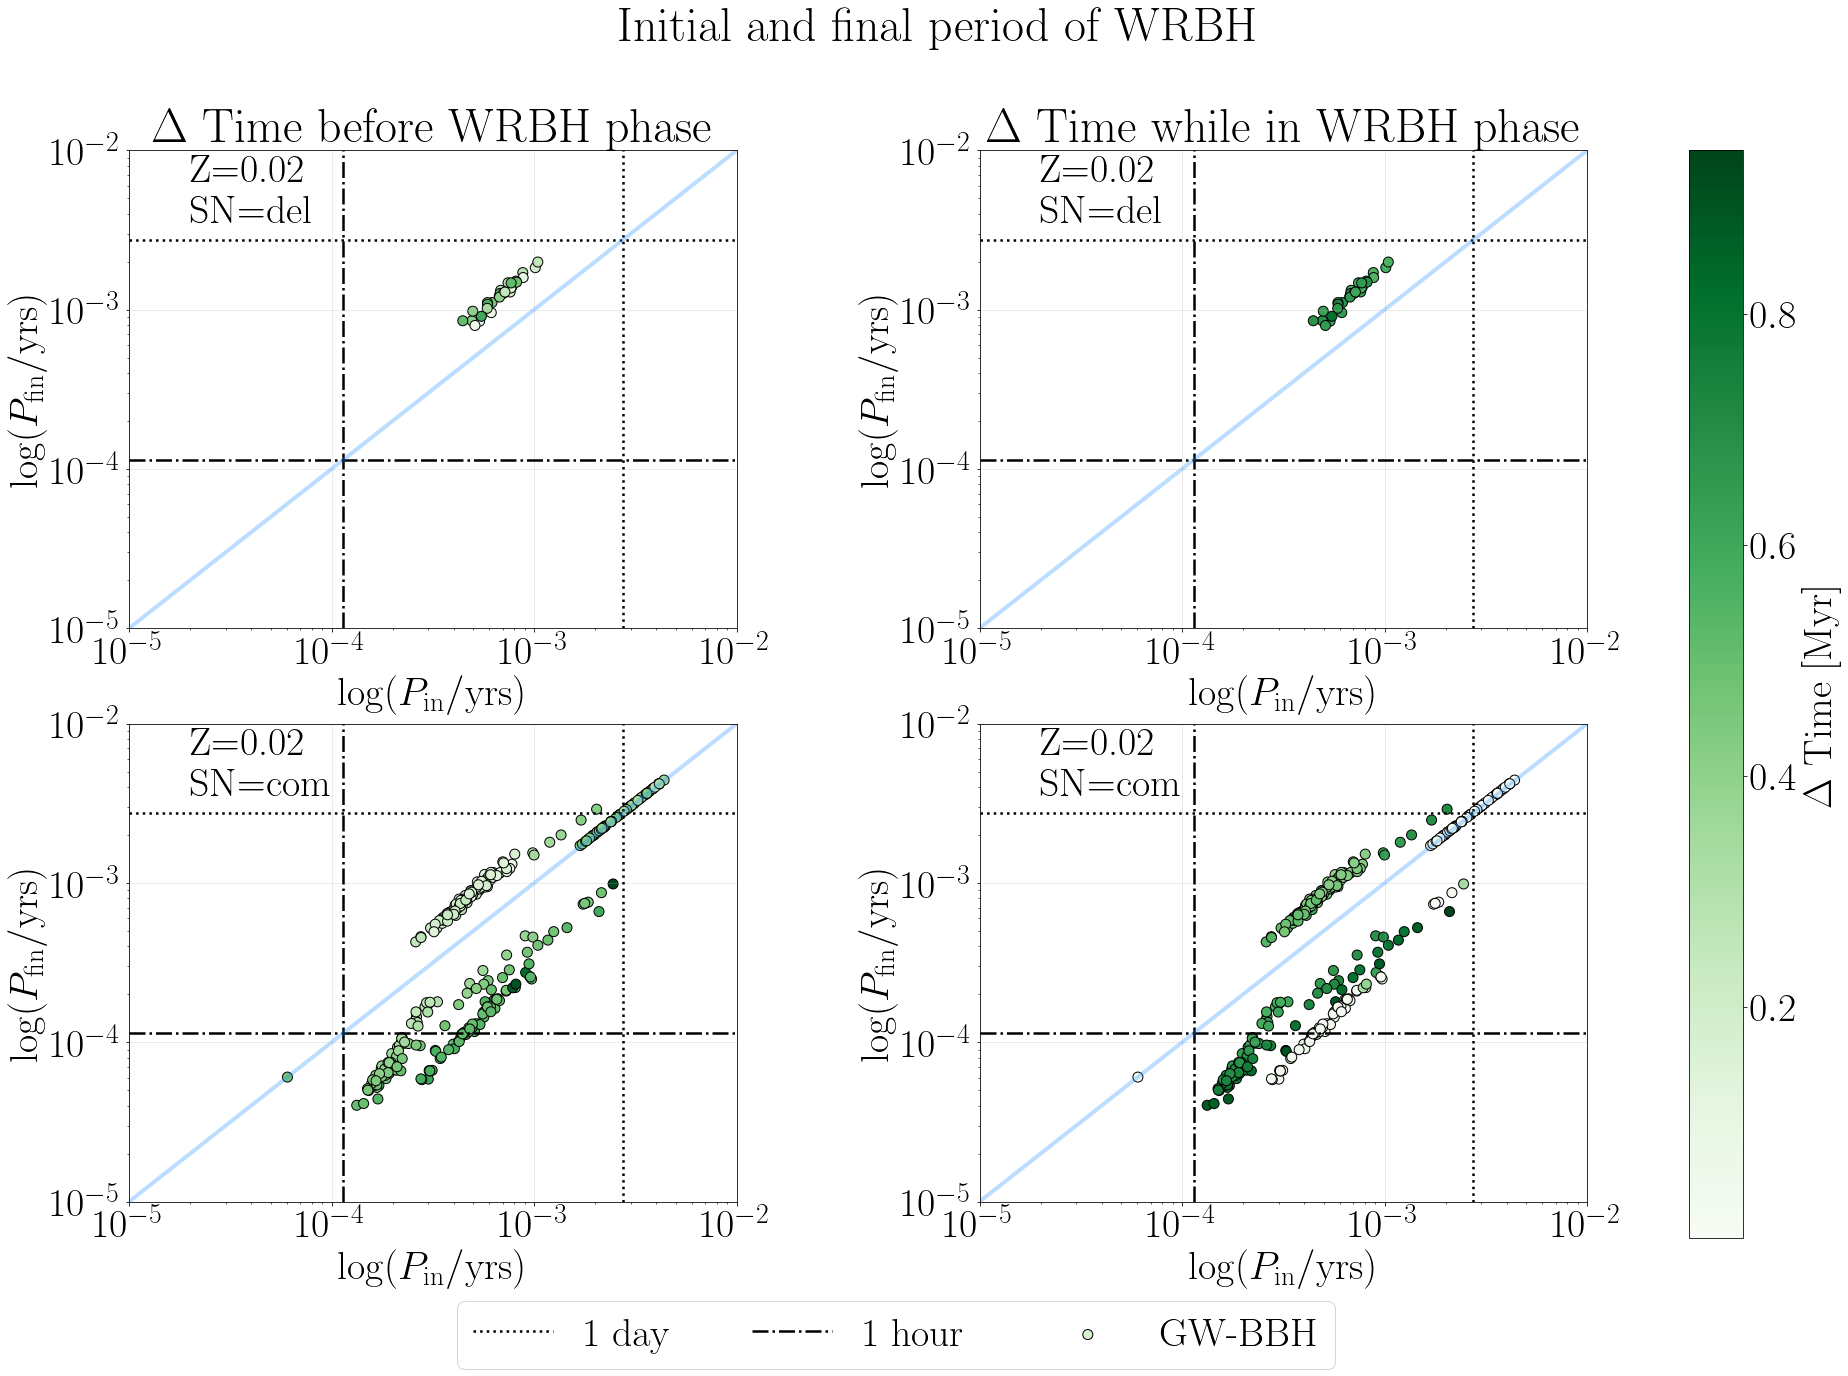

In [68]:
plottype = 'scatter2D_deltatime_WRBH'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,20))
fig.suptitle('Initial and final period of WRBH')
cmap= cm.get_cmap('Greens')

for Z,SN,prefix,ax in zip(Z_list,SN_list,prefix_list,axs.flat):
    ### set paths ###
    path = f'{path_version}{Nsim}_Z{Z}_{SN}'             # folder path identifier for a specific simulation run
    
    ### extract data ###  
    # progenitors and remnants of WRBH
    path_df_prog = f'./{path}/dataframes/progenitors/'        # where progenitor dataframes are stored
    path_df_rem = f'./{path}/dataframes/remnants/'            # where remnant dataframes are stored

    p,r = pd.read_csv(f'{path_df_prog}p_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_rem}r_BHBH_GW_WRBH.csv')

    
    # initial and final state of WRBH

    path_df_in = f'./{path}/dataframes/initial_WRBH/'        # where initial timesteps of WRBH are stored
    path_df_fin = f'./{path}/dataframes/final_WRBH/'         # where final timesteps of WRBH are stored

    i,f = pd.read_csv(f'{path_df_in}i_BHBH_GW_WRBH.csv'), pd.read_csv(f'{path_df_fin}f_BHBH_GW_WRBH.csv')

    ax.set_xlabel(r'$\displaystyle \log(P_{\rm in}/\rm yrs)$')
    ax.set_ylabel(r'$\displaystyle \log(P_{\rm fin}/\rm yrs)$')
    

    
    # make sure that both period-coordinates refer to the same binary
    p, r =p.sort_values(by='ID'), r.sort_values(by='ID')
    i, f =i.sort_values(by='ID'), f.sort_values(by='ID')
    
    
    deltaq_i_p = i['BWorldtime']-0
    deltaq_f_i = f['BWorldtime']-i['BWorldtime']
    
    # plot
    if (ax == axs[0][0]) | (ax == axs[1][0]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_i_p,cmap=cmap,s=100, label='GW-BBH')

    elif (ax == axs[0][1]) | (ax == axs[1][1]):
        cs = ax.scatter(i['Period'],f['Period'] , marker='o', edgecolor = 'k', c=deltaq_f_i,cmap=cmap,s=100, label='GW-BBH')

    
    ax.axhline(y=1./365, linestyle='dotted', linewidth =lw, color='k', label='1 day') # 1 day in yrs unit of measure
    ax.axhline(y=1./(365*24), linestyle='dashdot', linewidth =lw, color='k', label='1 hour') # 1 hour in yrs unit of measure
    
    ax.axvline(x=1./365, linestyle='dotted', linewidth =lw, color='k') # 1 day in yrs unit of measure
    ax.axvline(x=1./(365*24), linestyle='dashdot', linewidth =lw, color='k') # 1 hour in yrs unit of measure
 
    ax.plot([1e-5,1e-2],[1e-5,1e-2], color='dodgerblue', alpha=0.3, linewidth=4)
    ax.annotate(f'Z=0.{Z} \n SN={SN}', xy=(0.1, 0.85),xycoords='axes fraction')
    ax.set_xlim(xmin=1e-5, xmax=1e-2) 
    ax.set_ylim(ymin=1e-5, ymax=1e-2)      
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

    

cbar=plt.colorbar(cs, ax=axs[:,1],orientation='vertical')
cbar.set_label(r'$\Delta$ Time [Myr]')
#cbar.set_ticks([0,1,2])

axs[0][0].set_title(r'$\Delta$ Time before WRBH phase')
axs[0][1].set_title(r'$\Delta$ Time while in WRBH phase')

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.48,0.02))   # 0.48

#plt.tight_layout()
fig.subplots_adjust(bottom=0.15,  right=0.8,wspace = 0.4 )

plt.show()
fig.savefig(f'{path_plots}{plottype}.jpg')